# **Credit Card Fraud Detection Project**

## **Importing required libraries**


In [48]:
import numpy as np                                                                  # Performing arithmetic operations and linear algebra
from numpy import mean                                                              # Calculating Mean
from numpy import std                                                               # Calculating Standard Deviation
import pandas as pd                                                                 # Data exploration and manipulation
import matplotlib.pyplot as plt                                                     # Data visualisation
import seaborn as sns                                                               # Data Visualisation
from collections import Counter                                                     # Importing Counter to count
from sklearn.preprocessing import StandardScaler                                    # Scaling the features before modeling
from sklearn.model_selection import train_test_split                                # Spitting the dataset into train and test data
from sklearn.preprocessing import PowerTransformer                                  # Distributing features normally
from sklearn.model_selection import KFold, StratifiedKFold                          # Performing K-Fold Cross Validation on Imbalanced data
from sklearn.model_selection import RepeatedStratifiedKFold                         # Performing K-Fold Cross Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                # Performing Hyperparameter Tuning 
from sklearn.pipeline import make_pipeline                                          # Creating a pipeline for multiple steps before during Model building.
from sklearn.feature_selection import RFE                                           # To eliminate unuseful features
from sklearn.linear_model import LogisticRegression                                 # Building Logistic Regression Classifier
from sklearn.model_selection import cross_val_score                                 # Checking Cross validation Score on Models
from sklearn.metrics import accuracy_score, confusion_matrix                        # Model Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score                 # Model Evaluation Metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc                           # Model Evaluation Metrics
from sklearn.tree import DecisionTreeClassifier                                     # Builing the Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier                                 # Building a Random Forest Classifier
from xgboost import XGBClassifier                                                   # Building the XGBoost Classifer
from imblearn.over_sampling import RandomOverSampler                                # To balance the data by oversampling the minority class
from imblearn.over_sampling import SMOTE                                            # To balance the data by producing synthetic minority class data points
from imblearn.over_sampling import ADASYN                                           # To balance the data by producing adaptive synthetic minority class data points
import itertools


import warnings                                                                     # To avoid warnings
warnings.filterwarnings('ignore')

## **Loading the data**



In [2]:
# Loading the data
file_csv = '/content/drive/My Drive/Colab Notebooks/creditcard.csv'
data = pd.read_csv(file_csv)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# data points with class variable == 1 i.e. The Fraud Transactions

data[data['Class']==1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [4]:
# data points with class variable == 0 i.e. The Legitimate Transactions

data[data['Class']==0].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# (rows,columns)

data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **Exploratory Data Analysis & Data Manipulation**


### Checking for null values

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values present in the dataset, which is a good thing and compliments the quality of the data

### Checking and Plotting the Class Imbalance if present

In [15]:
# Checking the class imbalance in the dataset

class_dist = data['Class'].value_counts()
class_dist

0    284315
1       492
Name: Class, dtype: int64

In [16]:
# Percentage of class imbalance

print('Legitimate Transactions = {0} %'.format(round(class_dist[0]/data.shape[0]*100,2)))
print('Fraudulent Transactions = {0} %'.format(round(class_dist[1]/data.shape[0]*100,2)))

Legitimate Transactions = 99.83 %
Fraudulent Transactions = 0.17 %


**Class** **Imbalance**

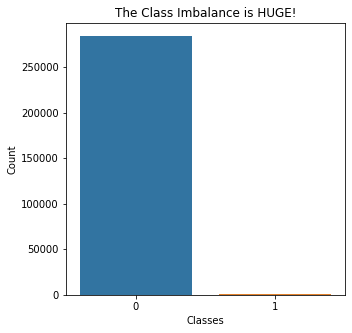

In [17]:
# Plotting the class imbalance

plt.figure(figsize=(5,5))
x = class_dist.index
y = class_dist
sns.barplot(x = x, y = y, data = data)
plt.title('The Class Imbalance is HUGE!')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

### Visualising the dataset

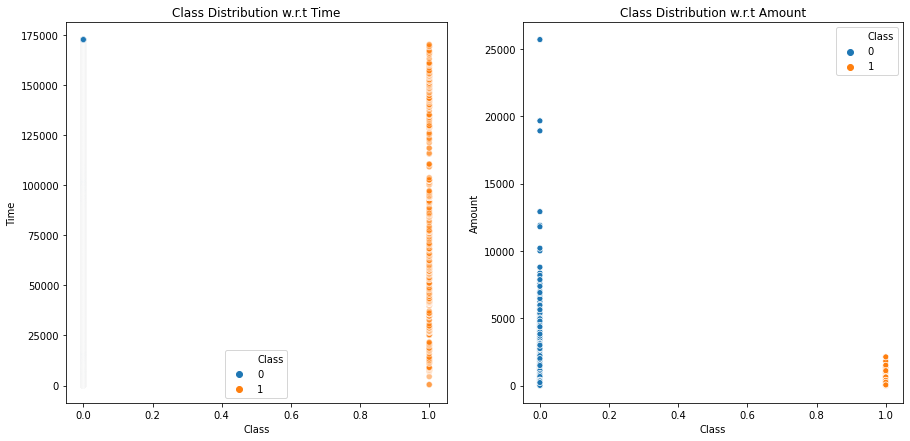

In [18]:
# Plotting the only 2 raw (Non-PCA Transformed) columns with respect to the Class

plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
x = data['Class']
y = data['Time']
sns.scatterplot(x = x, y = y, data = data, hue= data['Class'], alpha=0.5)
plt.title('Class Distribution w.r.t Time')

plt.subplot(1,2,2)
x = data.Class
y = data['Amount']
sns.scatterplot(x = x, y = y, data = data, hue = data['Class'])
plt.title('Class Distribution w.r.t Amount')

plt.show()

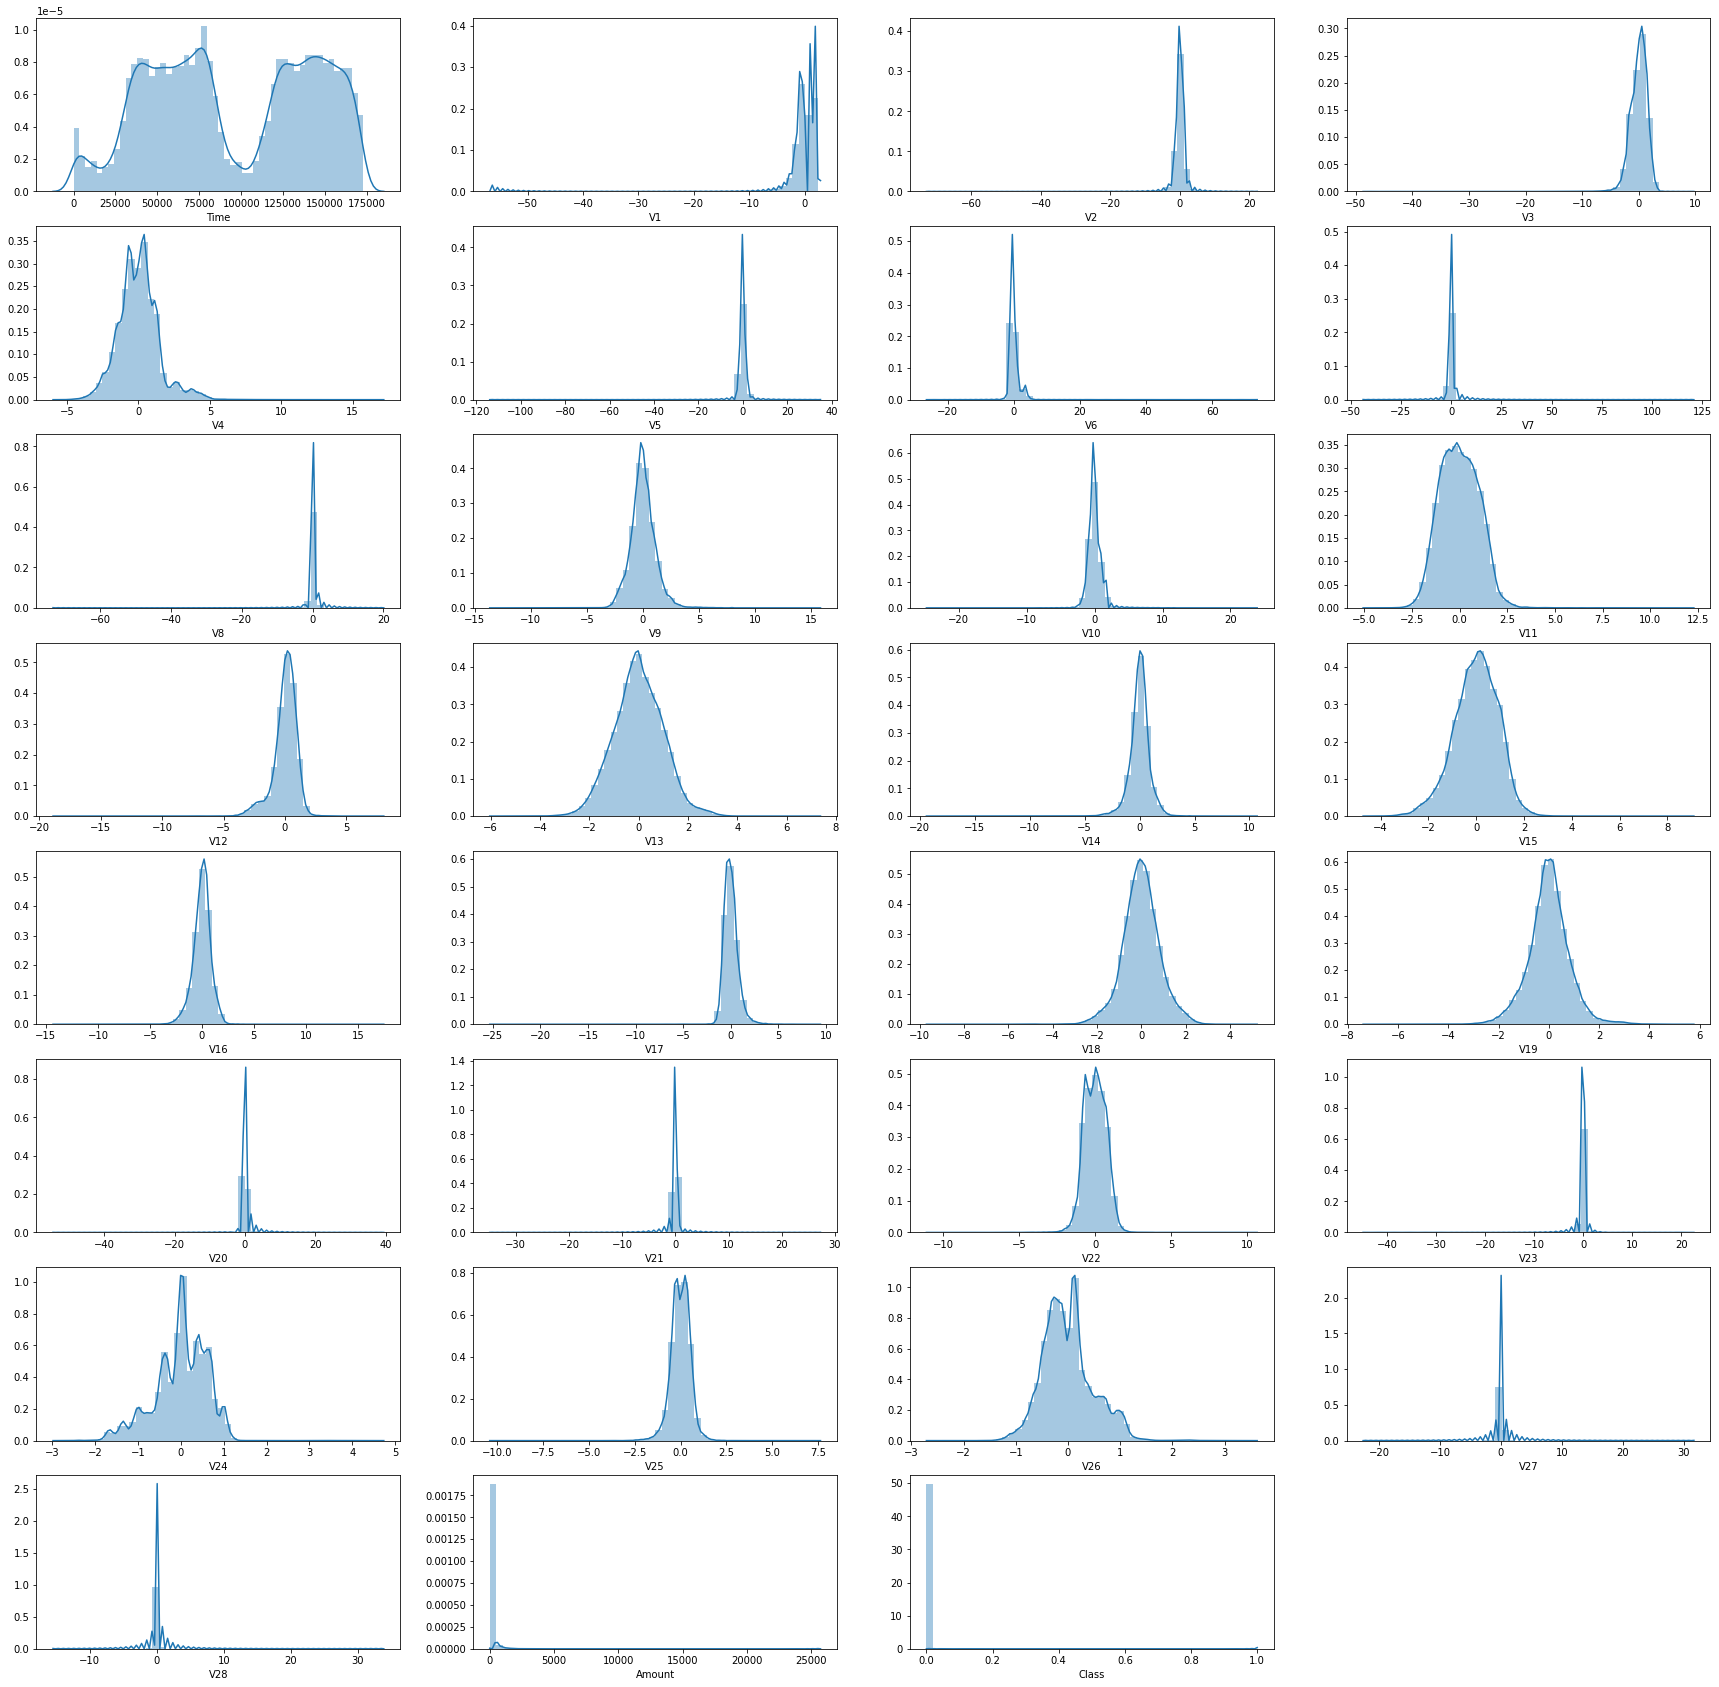

In [19]:
# Plotting the distribution of each variable in the dataset

plt.figure(figsize=(30,30))

for i in enumerate(data.columns):
  plt.subplot(8,4,i[0]+1)
  sns.distplot(data[i[1]], hist = True)

Some of the variables in the dataset are not distributed normally (Gaussian) and this might affect the performance of our models, we will transform the varaibles to be normally distributed using PowerTransformer

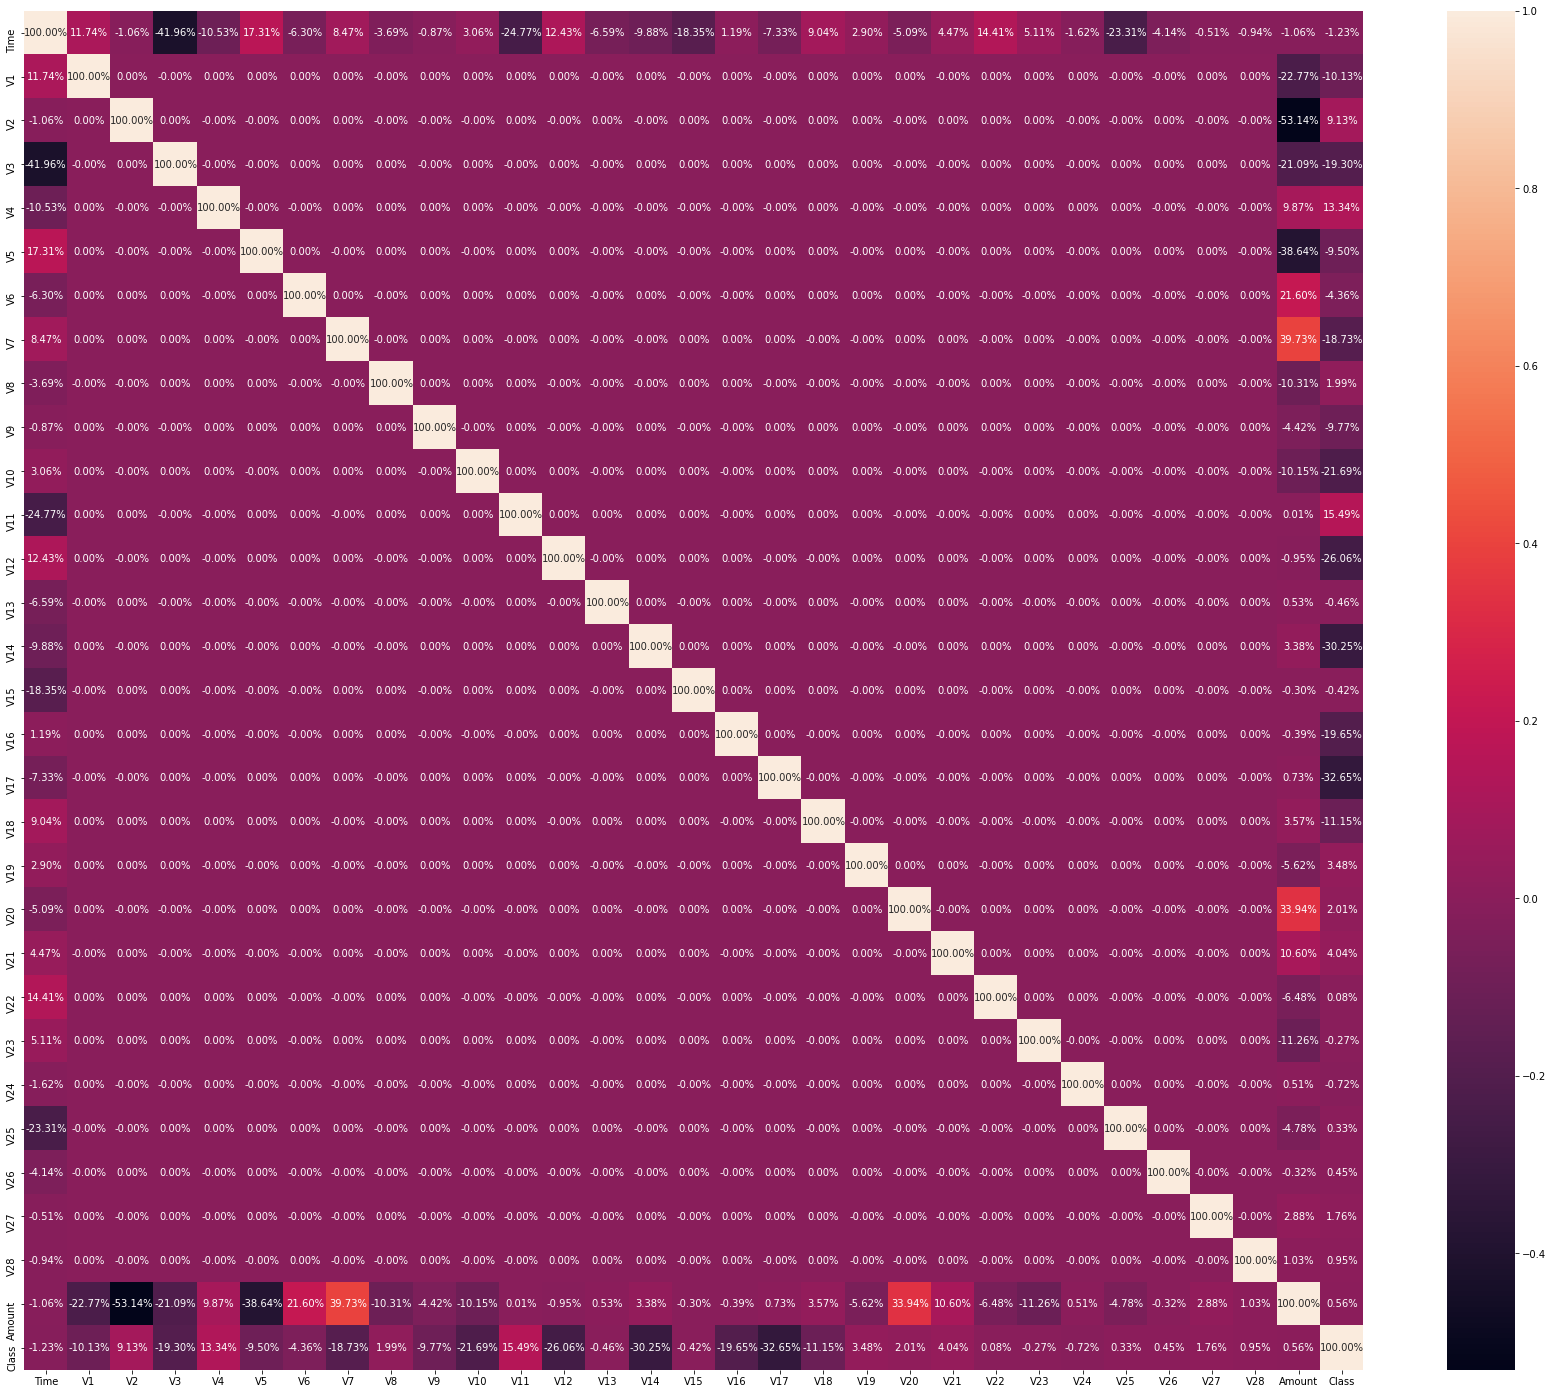

In [20]:
# Exploring the multicollinearity of the dataset

plt.figure(figsize= (30,25))
sns.heatmap(data.corr(), annot=True, fmt='.2%')
plt.show()

Since majority of the features are PCA Transformed, there is hardly any correlation between them, however these features are correlated with the amount and the time variable in the dataset.

It can be seen that the 28 features are PCA transformed, it's safe to assume that these feautures had already been scaled prior to PCA. We are going to scale the other non-scaled features as well using StandardScaler.

## **Model Building Iterations** 

There are going to be certain iterations of the training data that is going to be used for model building. The iterations will be as follows:


> Imbalanced Training Data - The data will contain the above mentioned highly imabalanced class. The Evaluations of these models will be later used for comparison.

> Randomly Oversampled Data - In this case the data will be balanced by replicating the already present data points belonging to the minority class label i.e. fraudulent transactions. There's a similar process that randomly reduces the data points belonging to the majority class label i.e. legitimate transactions but to make both the classes balanced we'll we'll have to drop a lot of data which will just result in loss of information and not worth it.

> Synthetic Minority Over-sampling Technique (SMOTE) - SMOTE is a lot sophesticated than the random oversampling technique becasue it produces synthetic data that is close to the authentic fraud transaction data points. This helps us have a target class that has more variance and gives new yet similar data for the model to be trained on.

> Adaptie Synthetic Sampling (ADASYN) - This technique is the most adavnced out of the bunch and takes SMOTE a level ahead, it takes an adaptive approach (as the name suggests) and increases the minority clusters in the minority class label to produce new synthetic data points that helps to project even better variance in the data.






### Hyper-tuning Evaluation Functions

In [52]:
def hypertuning_results(classifier, n_hp):
    
    pd_name = str(classifier)+'_results'

    print('Best Parameters: {0}'.format(classifier.best_params_))
    print('Best Score: {0}'.format(classifier.best_score_))

    pd_name = pd.DataFrame(classifier.cv_results_)
    col_list = ['mean_test_score', 'mean_train_score']
    for i in range(n_hp):
        col_list.append(pd_name.columns[i+4])
    print(pd_name[col_list])

    plt.figure(figsize=(16,6))

    plt.plot(pd_name.index, pd_name["mean_test_score"])
    plt.plot(pd_name.index, pd_name["mean_train_score"])
    plt.xlabel('Folds')
    plt.ylabel('ROC-AUC')
    plt.title("Performance Comparison")
    plt.legend(['Test score', 'Train score'], loc='best')

### Model Evaluation Functions

In [22]:
def confusion_matrix_graph(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def matrix_and_ROC_curve(classifier, X_train, y_train, X_test, y_test):
    name = classifier[0]
    classifier = classifier[1]
    mean_fpr = np.linspace(0, 1, 100)
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    
    #Obtain probabilities for each class
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' + name)
    plt.legend(loc="lower right")
    plt.figure(figsize = (4,3))
    plt.show()
    
    #Store the confusion matrix result to plot a table later
    y_pred=classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cnf_matrix
    
    #Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = (2*precision*recall)/(precision+recall)
    print('Accuracy = {:2.2f}%'.format(accuracy*100))
    print('Precision = {:2.2f}%'.format(precision*100))
    print('Recall = {:2.2f}%'.format(recall*100))
    print('F1-Score = {0}'.format(f1_score))
    
    # Plot confusion matrix
    plt.figure(figsize = (8,4))
    confusion_matrix_graph(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

### Separating the Independent and Target Variable

In [23]:
y = data['Class']
X = data.drop('Class', 1)

## **Model Building (*Imbalanced Dataset*)**

We'll first build our models on the imbalanced dataset and see how different algorithms perform considering the huge imbalance in the class labels.

### **Train-Test Split**

In [24]:
# We'll utilise the startify parameter in this sklearn function to make sure that even with the imbalanced dataset, the minority class label is proportionally split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 42)

In [25]:
#  Checking the train and test sets

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

            Time        V1        V2  ...       V27       V28   Amount
249927  154640.0 -0.012102  0.707332  ...  0.235922  0.083758     7.13
214082  139525.0  1.776151 -0.184642  ... -0.075228 -0.056755   150.00
106005   69778.0 -1.083391 -4.440527  ... -0.316982  0.227833  1302.49
58619    48473.0 -0.518847  1.025087  ...  0.010804  0.254309     4.49
191638  129350.0 -0.640421  0.212171  ...  0.074029 -0.033344     4.49

[5 rows x 30 columns]
249927    0
214082    0
106005    0
58619     0
191638    0
Name: Class, dtype: int64
            Time        V1        V2  ...       V27       V28  Amount
186882  127294.0 -2.537331  1.890864  ... -0.177157 -0.082691   37.40
165754  117632.0 -0.250839  1.104108  ...  0.143897  0.136810    9.27
235285  148330.0  0.568980 -2.520416  ... -0.096970  0.088686  700.00
101271   67778.0  1.328892  0.226908  ... -0.031732  0.017501   14.99
5832      6308.0  1.124863 -0.165691  ...  0.001142  0.017673   17.25

[5 rows x 30 columns]
186882    0
165754    

In [26]:
# Checking minority class split
print(len(y_train[y_train == 1]))
print(len(y_test[y_test == 1]))

# Checking stratified Split
print(len(y_train[y_train == 0])/len(y_train[y_train == 1]))

344
148
578.546511627907


It should be noted that the minority class in y_train and y_test is in the ratio **7:3** and the class labels themselves are just as imbalanced, hence it can be concluded that we have a balanced split.

Now we've to make sure that the training data i.e. X_train's features must be distributed normally. For this purpose we'll utilise the Powertransformer.

### Performing **Power Transformation**

In [27]:
pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train_pt, columns= X_train.columns)
X_test = pd.DataFrame(X_test_pt, columns= X_test.columns)
X_train.head()
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.700776,-1.321915,1.321042,-0.683540,-0.775206,-1.498690,0.387492,-2.203971,-2.725674,-0.406130,0.144201,-1.659656,0.633858,0.418093,0.932408,0.518718,-1.083688,0.657912,1.894902,-0.970452,-2.493833,5.396941,-2.858799,1.692894,-0.487886,-1.991755,-1.019731,-0.444834,-0.247288,0.332847
1,0.515549,-0.401955,0.700339,-0.005694,0.367943,0.871325,-0.181451,1.095979,-0.205780,-0.877709,-0.207385,0.285399,0.331714,-0.469909,0.686929,-1.351486,-0.755308,-0.507532,0.193569,0.745809,-0.167962,0.198491,0.678903,-0.640078,-0.716985,0.421758,-1.058867,0.347549,0.429015,-0.471909
2,1.093392,0.121799,-1.479285,-0.835889,1.160891,-0.817213,0.409930,0.154966,0.083995,0.786520,0.131731,0.545475,-0.441815,-2.328603,0.981633,0.515954,1.044532,-0.987889,1.002235,-0.677871,1.348965,0.448043,-1.045907,-0.304448,1.021275,-1.422576,-2.612971,-0.248881,0.282121,1.946803
3,-0.506414,0.747125,0.066540,-0.362838,0.343942,0.159319,-0.123465,0.026120,-0.154916,0.257134,-0.213291,-1.457918,-0.742487,-0.179516,-0.327224,1.457945,1.104895,-0.597087,0.270155,0.412840,-0.068633,-0.513758,-1.554657,-0.089345,-1.633633,0.710376,0.464031,-0.088535,0.063453,-0.196456
4,-2.125516,0.567744,-0.189898,0.959105,0.766776,-0.649679,0.265680,-0.660145,0.085821,1.955976,-0.578734,0.371015,-1.938696,1.071190,1.350775,-0.295464,-0.225000,1.067873,-0.416837,-0.734530,-0.256428,-0.284174,-0.289135,0.105440,-0.021353,0.226299,0.705265,-0.007399,0.063981,-0.115254


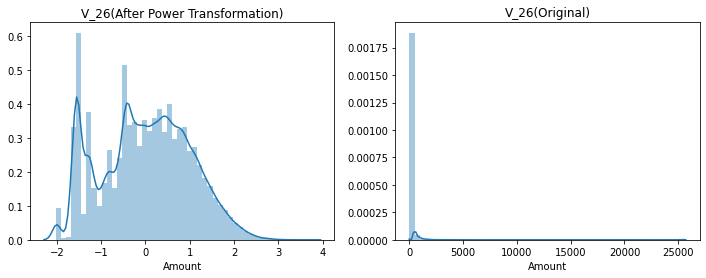

In [29]:
# Plotting one of the model for comparison

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(X_train.Amount, hist = True)
plt.title('V_26(After Power Transformation)')

plt.subplot(1,2,2)
sns.distplot(data.Amount, hist = True)
plt.title('V_26(Original)')

plt.show()

### Building a **Logistic Regression** Classifier **(Baseline Model)**
This will be our baseline model, we'll use this one to compare to the other balanced/weighted models that we will build.


In [31]:
model = LogisticRegression()
lr = model.fit(X_train, y_train)
y_pred_lr = lr.predict(X_train)

In [32]:
print('Accuracy of our baseline model: {0}'.format(accuracy_score(y_train, y_pred_lr)))

Accuracy of our baseline model: 0.9992827190465681


The model seems to be doing a great job if we look at the accuracy of the model however for such a highly imbalanced data, accuracy is not the right parameter to judge teh classification capability of a model. Let's look at some other parameters that are not affected by the huge class imbalance.

#### Cross Validation Scores for the Baseline Model

In [33]:
print('Precision: {0}'.format(cross_val_score(lr, X_train, y_train, scoring='precision', cv = 5).mean()))
print('Recall: {0}'.format(cross_val_score(lr, X_train, y_train, scoring='recall', cv = 5).mean()))
print('F1 Score: {0}'.format(cross_val_score(lr, X_train, y_train, scoring='f1', cv = 5).mean()))
print('ROC_AUC: {0}'.format(cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv = 5).mean()))
print('Accuracy: {0}'.format(cross_val_score(lr, X_train, y_train, scoring='accuracy', cv = 5).mean()))

Precision: 0.8922913905891757
Recall: 0.6509377664109122
F1 Score: 0.752283461390058
ROC_AUC: 0.9823326006725368
Accuracy: 0.9992626544133161


### Hypertuning a **Logistic Regression** Classifier



In [34]:
# # Using RandomizedSearchCV to coarse tune the range of the hyperparameters.

# cv = StratifiedKFold(n_splits=3, random_state = 42)

# logreg = LogisticRegression()

# hyper_params = {'class_weight' : ['balanced', None], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']} 

# logreg_cv = RandomizedSearchCV(logreg, hyper_params, scoring= 'roc_auc', cv = cv, return_train_score=True)
# logreg_cv.fit(X_train,y_train)

The below mentioned Hyperparameter range was reached by running RandomizedSearchCV multiple times and manually eliminating the elements from the range.

In [282]:
# Performing Hyperparameter Tuning using GridSearch

cv = StratifiedKFold(n_splits=3, random_state = 42)

logreg = LogisticRegression()

hyper_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
n_hp = len(hyper_params)

logreg_cv = GridSearchCV(logreg, hyper_params, scoring= 'roc_auc', cv = cv, return_train_score=True)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

Best Parameters: {'C': 0.1}
Best ROC-AUC Score: 0.9819206917097439
   mean_test_score  mean_train_score param_C
0         0.978047          0.982472   0.001
1         0.981847          0.987176    0.01
2         0.981921          0.987016     0.1
3         0.980978          0.986523       1
4         0.980827          0.986448      10


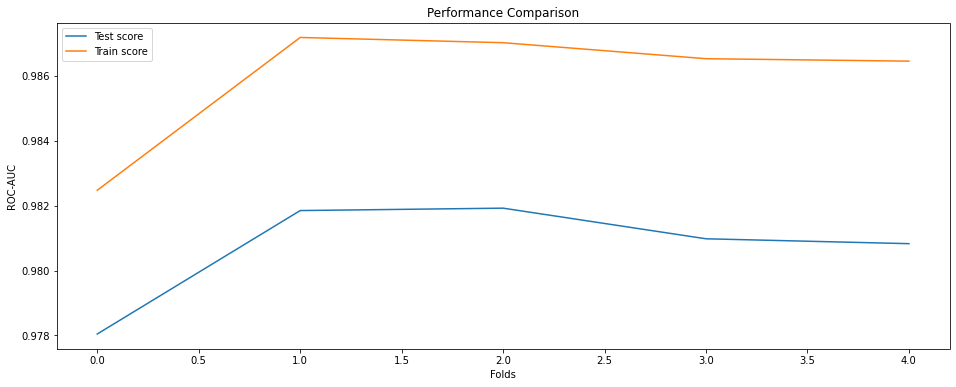

In [283]:
hypertuning_results(logreg_cv,n_hp)

### Hypertuning a **Decision Tree** Classifier 

In [37]:
# # Using RandomizedSearchCV to coarse tune the range of the hyperparameters.

# cv = StratifiedKFold(n_splits=3, random_state = 50)

# dtree = DecisionTreeClassifier()

# depths = np.arange(1,21)
# n_leafs = [1,5,10,20,50,100]

# hyper_params = [{'max_depth':depths, 'min_samples_leaf': n_leafs, 'class_weight':['balanced', None]}]

# dtree_cv = RandomizedSearchCV(dtree, hyper_params, scoring = 'roc_auc', cv = cv, return_train_score=True)
# dtree_cv.fit(X_train, y_train)

The below mentioned Hyperparameter range was reached by running RandomizedSearchCV multiple times and manually eliminating the elements from the range.

In [49]:
cv = StratifiedKFold(n_splits=3, random_state = 50)

dtree = DecisionTreeClassifier()

depths = np.arange(5,13)
n_leafs = [10,20,50,100]

hyper_params = {'max_depth':depths, 'min_samples_leaf': n_leafs}
n_hp = len(hyper_params)

dtree_cv = GridSearchCV(dtree, hyper_params, scoring = 'f1', cv = cv, return_train_score=True)
dtree_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=50, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
       

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 50}
Best ROC-AUC Score: 0.9557352018406592
    mean_test_score  mean_train_score param_max_depth param_min_samples_leaf
0          0.914147          0.928713               5                     10
1          0.921363          0.930152               5                     20
2          0.937161          0.952749               5                     50
3          0.936896          0.956185               5                    100
4          0.907663          0.937570               6                     10
5          0.919261          0.938999               6                     20
6          0.938272          0.965173               6                     50
7          0.941175          0.960679               6                    100
8          0.912535          0.950035               7                     10
9          0.930063          0.951471               7                     20
10         0.941283          0.968490               7   

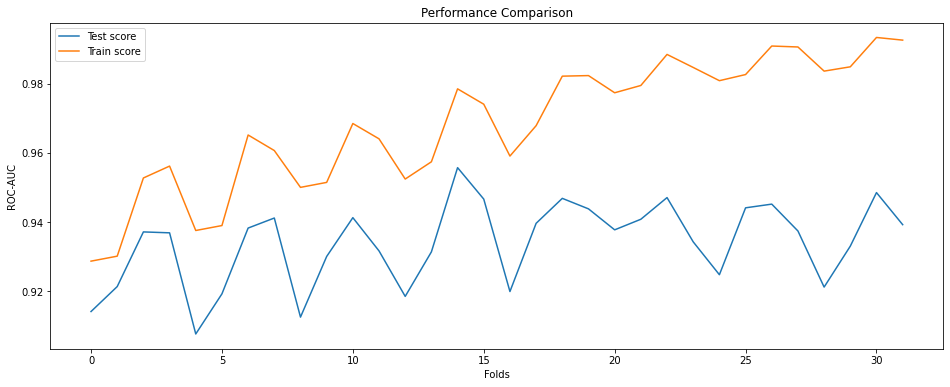

In [39]:
hypertuning_results(dtree_cv,n_hp)

### Hypertuning a **Random Forest** Classifier 

In [53]:
cv = StratifiedKFold(n_splits = 3, random_state=42)

rf_clf = RandomForestClassifier()

n_est = [100,200]
max_feat = ['auto','log2']

hyper_params = {'n_estimators':n_est, 'max_features':max_feat}
n_hp = len(hyper_params)

rf_clf_cv = RandomizedSearchCV(rf_clf, hyper_params, scoring = 'f1', cv=cv, return_train_score=True)
rf_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                    

Best Parameters: {'n_estimators': 100, 'max_features': 'auto'}
Best Score: 0.853832660247809
   mean_test_score  mean_train_score param_n_estimators param_max_features
0         0.853833               1.0                100               auto
1         0.847496               1.0                200               auto
2         0.845558               1.0                100               log2
3         0.845758               1.0                200               log2


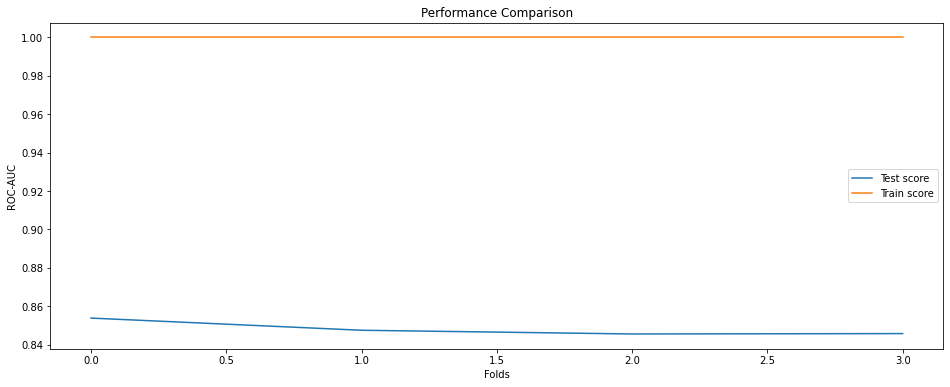

In [54]:
hypertuning_results(rf_clf_cv,n_hp)

### Hypertuning an **XGBoost** Classifier

In [88]:
cv = StratifiedKFold(n_splits=3, random_state = 42)

xgbclf = XGBClassifier(learning_rate=0.1, objective='binary:logistic', nthread=4)

depths = range(3,10,2)
child_weight = range(1,6,2)

hyper_params = {'max_depth': depths, 'min_child_weight': child_weight}
n_hp = len(hyper_params)

xgbclf_cv = RandomizedSearchCV(xgbclf, hyper_params,cv=cv, scoring='roc_auc',n_jobs=-1, return_train_score = True)
xgbclf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=4,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
         

Best Parameters: {'min_child_weight': 5, 'max_depth': 5}
Best ROC-AUC Score: 0.9782431884437081
   mean_test_score  mean_train_score param_min_child_weight param_max_depth
0         0.976646          0.999703                      3               5
1         0.976267          0.998347                      1               3
2         0.976426          0.997106                      5               3
3         0.975607          0.999350                      5               9
4         0.976637          0.997690                      3               3
5         0.976764          0.999848                      3               9
6         0.976559          0.999997                      1               9
7         0.978243          0.999023                      5               5
8         0.976248          0.999977                      1               5
9         0.975985          0.999997                      1               7


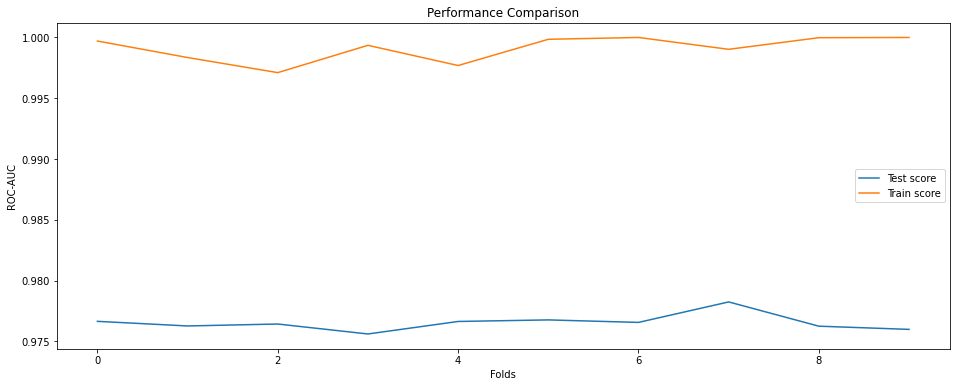

In [89]:
hypertuning_results(xgbclf_cv,n_hp)

## **Model Evaluation** *(Imbalanced Data)*

In [284]:
models = []

models.append(('Logistic Regression', LogisticRegression(C=0.1, random_state=42)))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=8, min_samples_leaf=50, random_state=42)))
models.append(('Random Forest', RandomForestClassifier(n_estimators =100, max_features = 'auto',random_state=42)))
models.append(('XGboost Classifier', XGBClassifier(min_child_weight= 5, max_depth= 5, random_state= 42)))

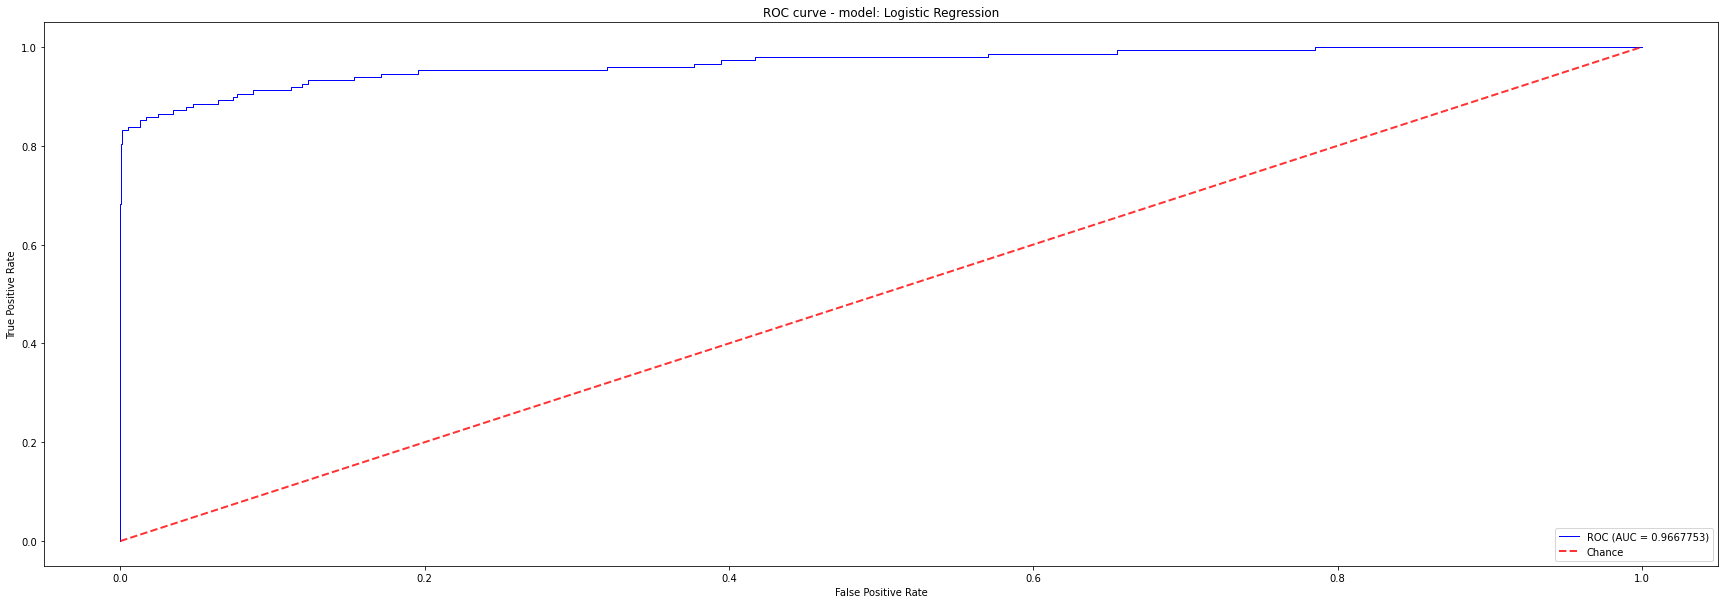

<Figure size 288x216 with 0 Axes>

Accuracy = 99.92%
Precision = 85.19%
Recall = 62.16%
F1-Score = 0.7187499999999999


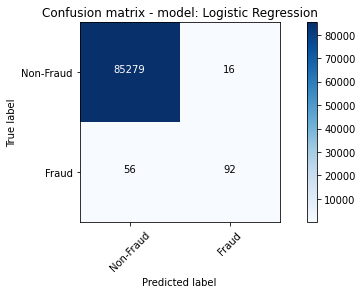

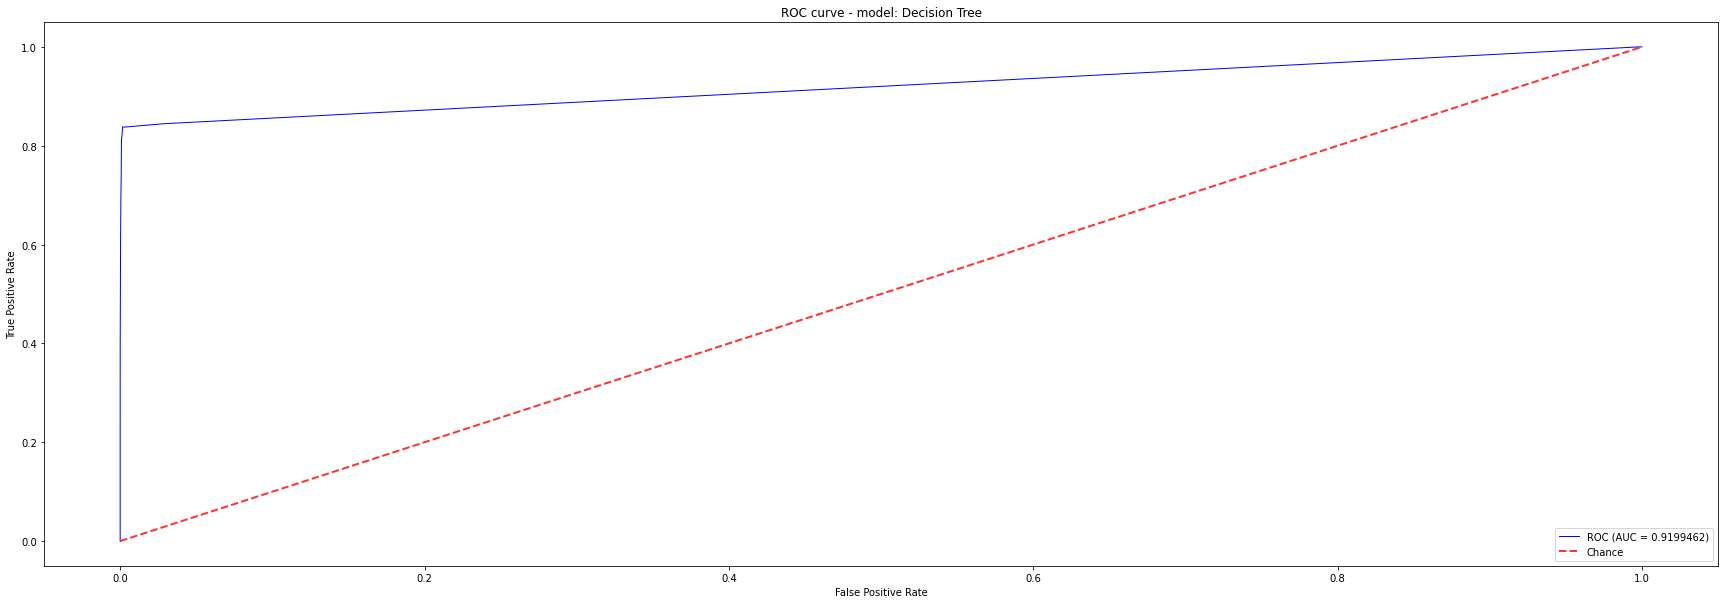

<Figure size 288x216 with 0 Axes>

Accuracy = 99.91%
Precision = 79.65%
Recall = 60.81%
F1-Score = 0.689655172413793


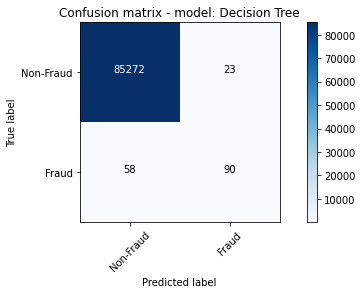

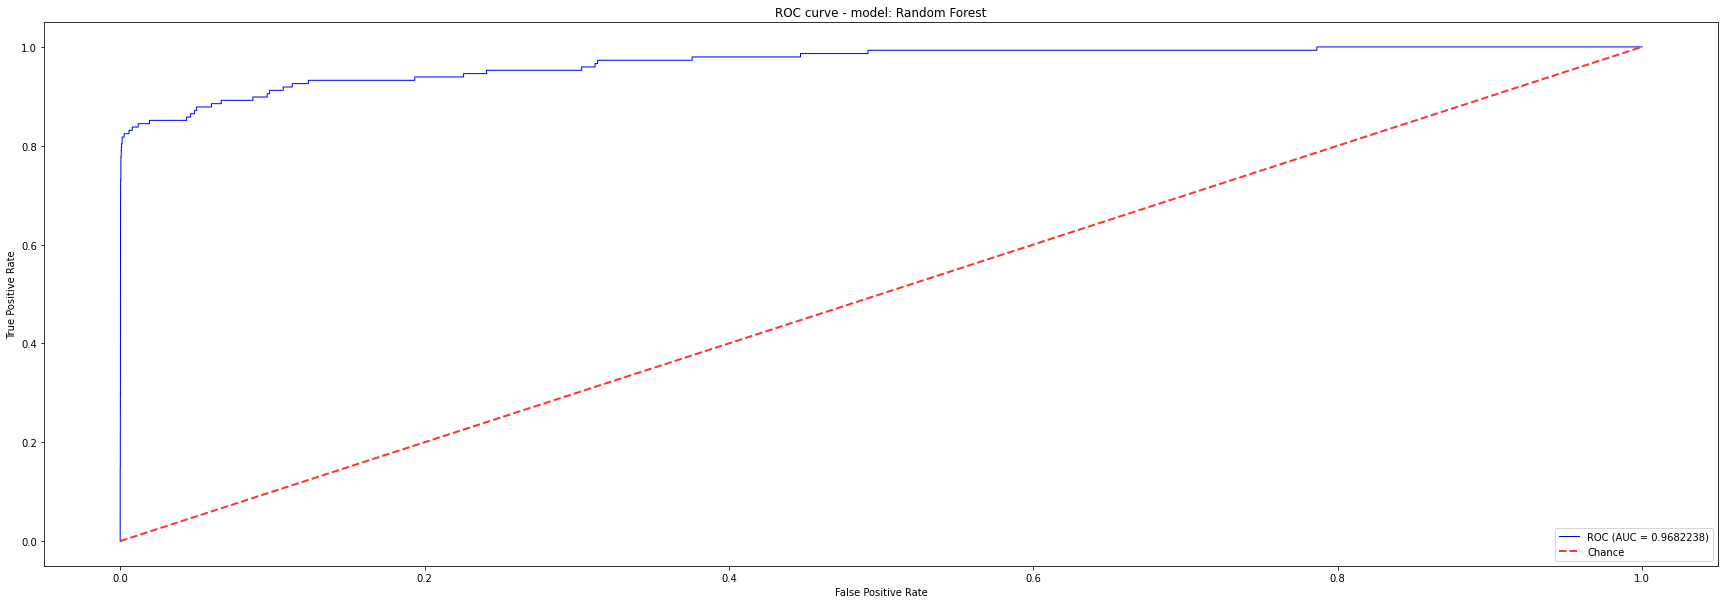

<Figure size 288x216 with 0 Axes>

Accuracy = 99.90%
Precision = 84.21%
Recall = 54.05%
F1-Score = 0.6584362139917695


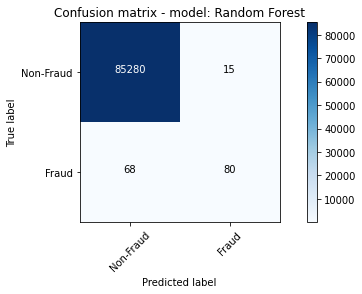

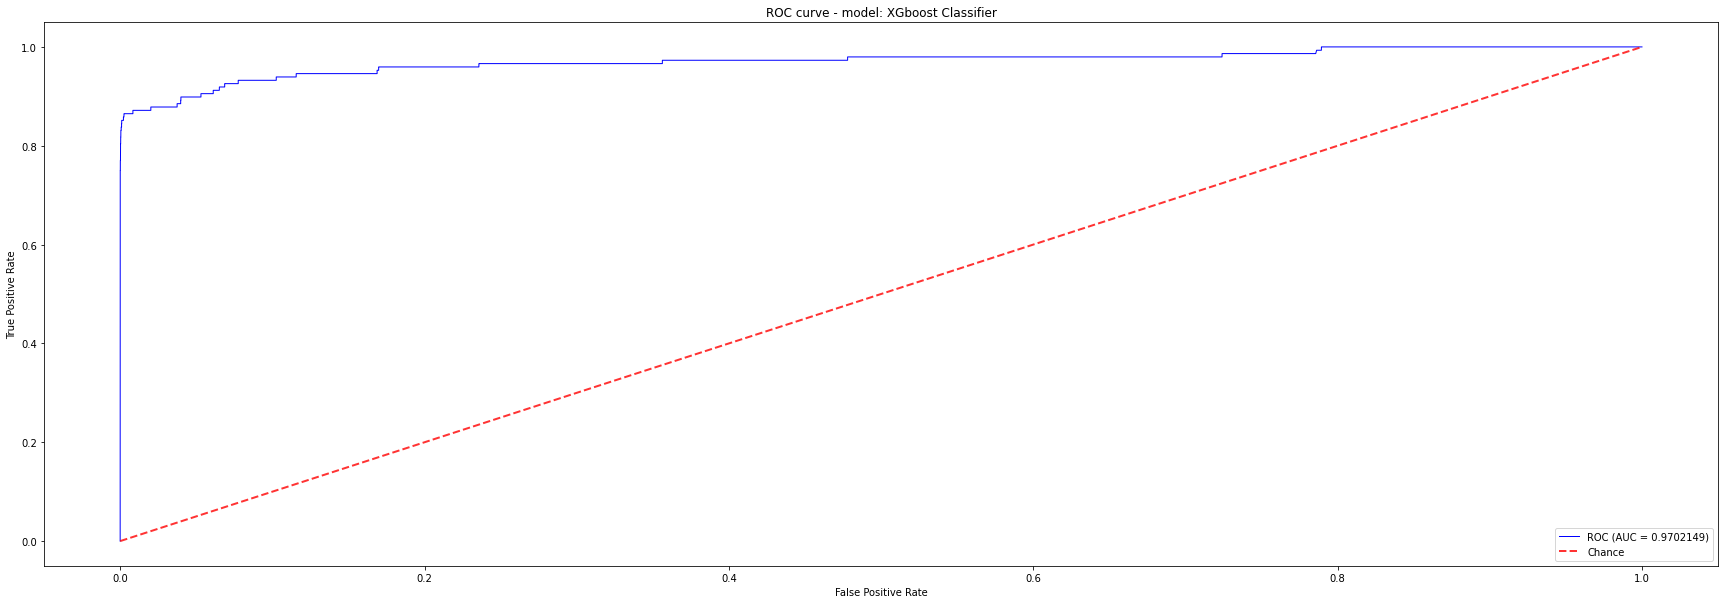

<Figure size 288x216 with 0 Axes>

Accuracy = 99.95%
Precision = 92.56%
Recall = 75.68%
F1-Score = 0.8327137546468402


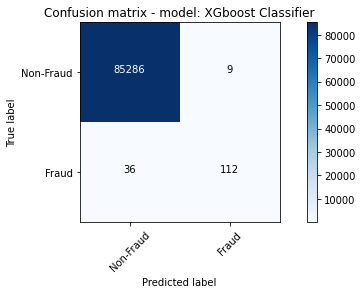

In [285]:
for model in models:
    matrix_and_ROC_curve(model, X_train, y_train, X_test, y_test)

## **Model Building *(Balanced Dataset - Random Oversampler)***

The Random Over-Sampling technique uses the current minority class and increases the number of occurances of the same data points. This accomplishes the goal of balancing the data and the models are trained equally on both the class labels.

### Performing **Random Oversampling**

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 42)

In [31]:
print('Existing Imbalance in the dataset {0}'.format(Counter(y)))

Existing Imbalance in the dataset Counter({0: 284315, 1: 492})


In [32]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [33]:
print('Data balanced using Random Oversampler {0}'.format(Counter(y_train_ros)))

Data balanced using Random Oversampler Counter({0: 199020, 1: 199020})


### Performing **Power Transformation**

In [34]:
pt = PowerTransformer()
X_train_ros_pt = pt.fit_transform(X_train_ros)
X_test_pt = pt.transform(X_test)

X_train_ros = pd.DataFrame(X_train_ros_pt, columns=X_train.columns)
X_test_ros = pd.DataFrame(X_test_pt, columns = X_test.columns)

In [35]:
X_train_ros.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.293379,0.185136,-0.225946,0.549576,-1.025602,0.480157,0.072737,0.755927,-0.156189,0.378014,0.491510,-0.371552,0.875156,-0.553808,0.922912,-0.958195,0.599755,0.207847,0.254964,0.067503,-0.159014,-0.188596,-0.540189,-0.001170,-0.592651,-0.784669,0.314660,0.048777,0.091172,-0.373058
1,1.037875,1.472894,-0.504569,-0.167875,-0.164538,0.489728,-0.140651,0.787210,-0.238761,0.306085,0.817208,-0.315903,0.766101,-0.935339,1.559532,-0.431914,0.379492,0.212338,0.521834,-0.208754,-0.151536,0.000494,0.417306,-0.260583,-0.562208,0.690353,-1.011229,-0.298809,-0.213077,1.064886
2,-0.285167,-0.188598,-2.212967,0.014163,-0.429405,-0.315640,0.007067,1.094727,-0.305041,-0.152154,0.615776,-0.828420,0.724109,1.056820,0.924767,0.884944,-0.115850,0.435311,1.002873,-1.167044,1.718850,0.024207,-1.246394,-1.028230,1.022193,-0.281721,1.639951,-0.542598,0.403457,1.939518
3,-0.766360,-0.015305,-0.134068,0.237408,-1.039732,1.377148,2.068114,0.455957,0.026865,0.303888,0.633991,-0.573820,0.403073,0.064423,0.539556,1.586693,0.722023,0.324727,0.578136,0.514927,0.086436,-0.174286,-0.653568,0.098642,1.998567,-1.183803,0.098809,-0.206783,0.460879,-0.591674
4,0.860941,-0.056071,-0.375963,0.611738,-1.680367,1.453338,2.378704,0.378592,0.061189,0.781354,0.468816,-0.796212,0.487731,-0.180614,0.495955,0.438760,0.485510,0.214964,0.301815,-0.587311,0.020852,-0.040827,0.625049,-0.342758,1.594749,-0.199814,1.204589,-0.137128,-0.162408,-0.591674


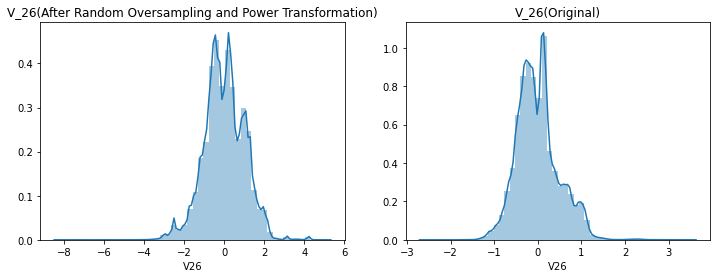

In [36]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(X_train_ros.V26, hist = True)
plt.title('V_26(After Random Oversampling and Power Transformation)')

plt.subplot(1,2,2)
sns.distplot(data.V26, hist = True)
plt.title('V_26(Original)')

plt.show()

### Hypertuning a **Logistic Regression** Classifier

In [49]:
# Using RandomizedSearchCV to Hypertune the model.

cv = StratifiedKFold(n_splits=5, random_state = 42)

logreg_ros = LogisticRegression()

hyper_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
n_hp = len(hyper_params)

logreg_ros_cv = RandomizedSearchCV(logreg_ros, hyper_params, scoring= 'roc_auc', cv = cv, return_train_score=True)
logreg_ros_cv.fit(X_train_ros,y_train_ros)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='roc

Best Parameters: {'C': 10}
Best ROC-AUC Score: 0.985142565386538
   rank_test_score  mean_train_score param_C
0                5          0.984348   0.001
1                4          0.985041    0.01
2                3          0.985149     0.1
3                2          0.985159       1
4                1          0.985160      10


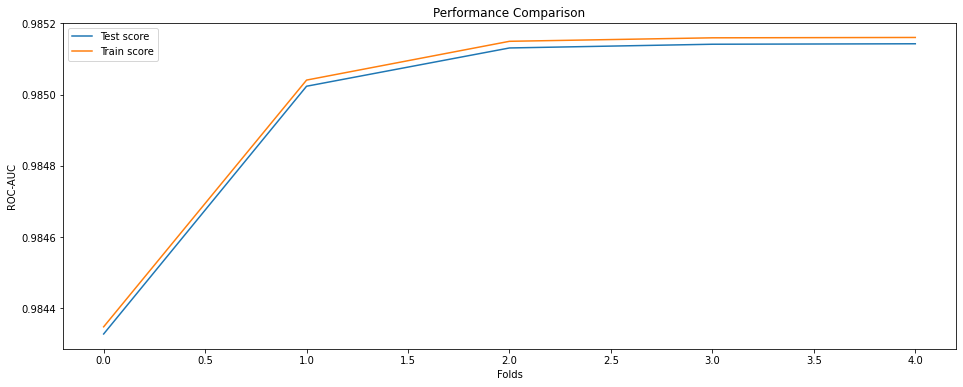

In [50]:
hypertuning_results(logreg_ros_cv,n_hp)

### Hypertuning a **Decision Tree** Classifier

In [51]:
# Using RandomizedSearchCV to Hypertune the model.

cv = StratifiedKFold(n_splits=5, random_state = 42)

dtree_ros = DecisionTreeClassifier()

depths = np.arange(10,16)
n_leafs = [10,20,50,100]

hyper_params = {'max_depth':depths, 'min_samples_leaf': n_leafs}
n_hp = len(hyper_params)

dtree_ros_cv = RandomizedSearchCV(dtree_ros, hyper_params, scoring = 'roc_auc', cv = cv, return_train_score=True)
dtree_ros_cv.fit(X_train_ros, y_train_ros)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
    

Best Parameters: {'min_samples_leaf': 20, 'max_depth': 15}
Best ROC-AUC Score: 0.9997354500593876
   rank_test_score  mean_train_score param_min_samples_leaf param_max_depth
0                2          0.999876                     20              14
1                8          0.999499                     10              11
2               10          0.997282                     20              10
3                5          0.999705                     50              12
4                7          0.999495                     50              11
5                1          0.999922                     20              15
6                9          0.997323                     10              10
7                6          0.999649                     20              12
8                4          0.999829                     10              13
9                3          0.999864                    100              14


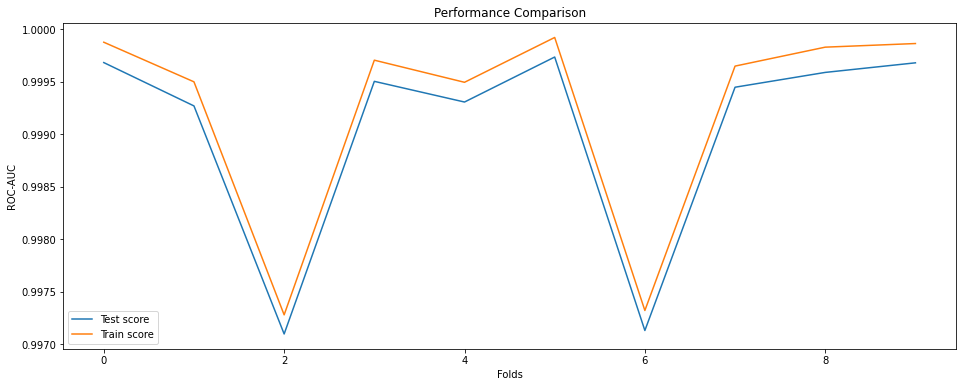

In [52]:
hypertuning_results(dtree_ros_cv,n_hp)

### Hypertuning a **Random Forest** Classifier 

In [55]:
cv = StratifiedKFold(n_splits = 3, random_state=42)

rf_clf_ros = RandomForestClassifier()

n_est = [100,200]
max_feat = ['auto','log2']

hyper_params = {'n_estimators':n_est, 'max_features':max_feat}
n_hp = len(hyper_params)

rf_clf_ros_cv = RandomizedSearchCV(rf_clf_ros, hyper_params, scoring = 'f1', cv=cv, return_train_score=True)
rf_clf_ros_cv.fit(X_train_ros, y_train_ros)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                    

Best Parameters: {'n_estimators': 100, 'max_features': 'log2'}
Best Score: 0.9999371968428369
   mean_test_score  mean_train_score param_n_estimators param_max_features
0         0.999935               1.0                100               auto
1         0.999932               1.0                200               auto
2         0.999937               1.0                100               log2
3         0.999932               1.0                200               log2


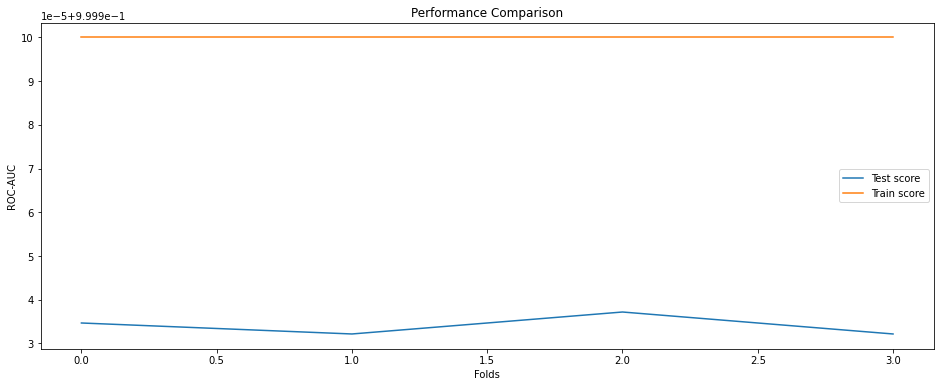

In [56]:
hypertuning_results(rf_clf_ros_cv,n_hp)

### Hypertuning a **XGBoost** Classifier

In [92]:
cv = StratifiedKFold(n_splits = 3, random_state = 42)

xgb_clf_ros = XGBClassifier(learning_rate=0.1, objective='binary:logistic', nthread=4)

depths = range(3,10,2)
child_weight = range(1,6,2)

hyper_params = {'max_depth': depths, 'min_child_weight': child_weight}
n_hp = len(hyper_params)

xgb_clf_ros_cv = RandomizedSearchCV(xgb_clf_ros, hyper_params, scoring = 'roc_auc',cv=cv, return_train_score = True, n_jobs=-1)
xgb_clf_ros_cv.fit(X_train_ros, y_train_ros)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=4,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
         

Best Parameters: {'min_child_weight': 1, 'max_depth': 9}
Best ROC-AUC Score: 0.9999882280619833
   mean_test_score  mean_train_score param_min_child_weight param_max_depth
0         0.999959          0.999976                      1               5
1         0.999988          1.000000                      1               9
2         0.999947          0.999966                      5               5
3         0.999979          0.999998                      5               7
4         0.999702          0.999715                      5               3
5         0.999984          0.999999                      5               9
6         0.999724          0.999735                      1               3
7         0.999984          0.999999                      3               9
8         0.999984          1.000000                      1               7
9         0.999984          0.999999                      3               7


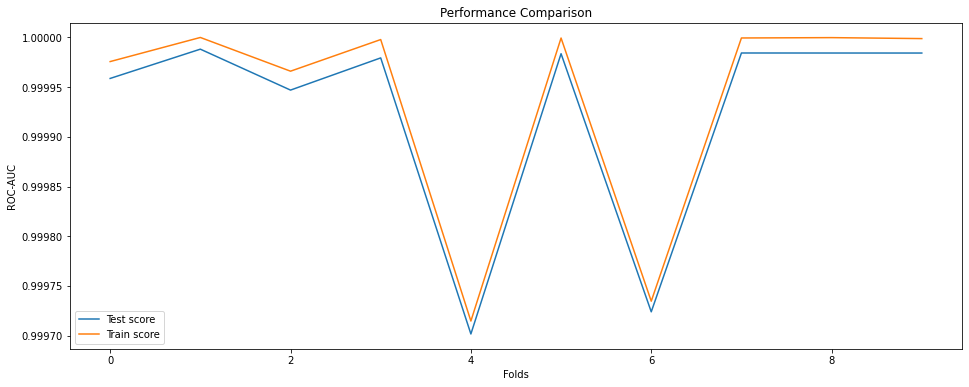

In [93]:
hypertuning_results(xgb_clf_ros_cv, n_hp)

## **Model Evaluation** *(Random OverSampler)*

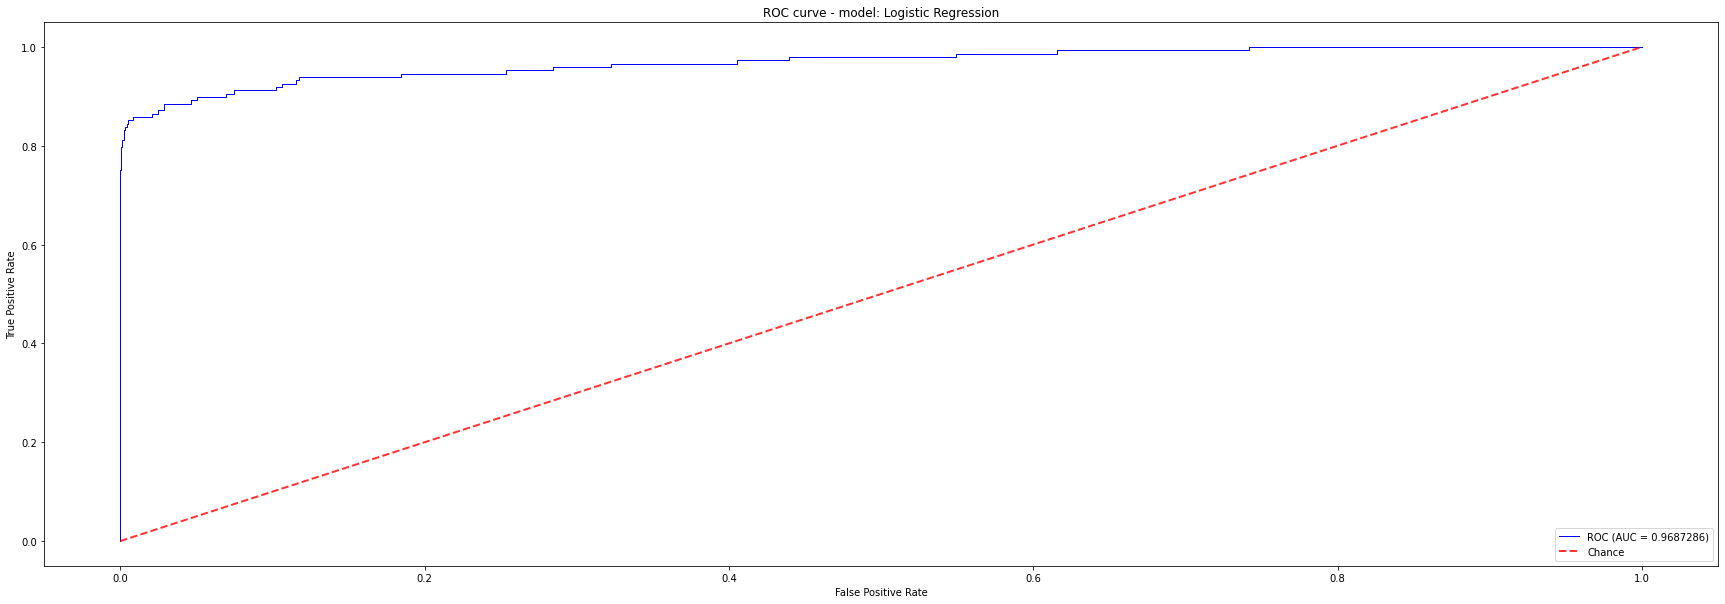

<Figure size 288x216 with 0 Axes>

Accuracy = 97.45%
Precision = 5.63%
Recall = 87.16%
F1-Score = 0.10569438754608766


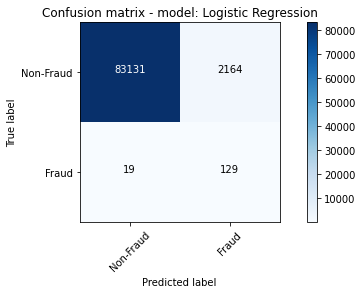

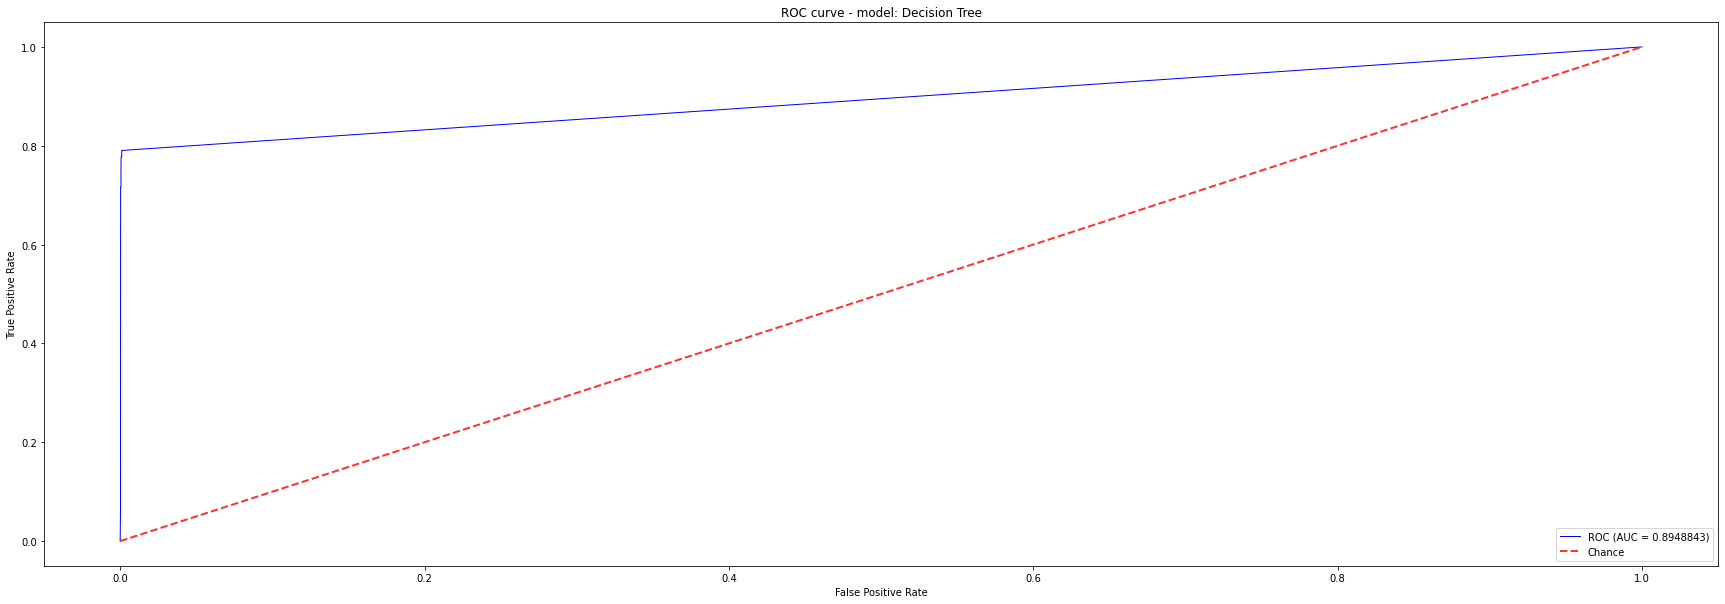

<Figure size 288x216 with 0 Axes>

Accuracy = 99.81%
Precision = 46.80%
Recall = 79.05%
F1-Score = 0.5879396984924623


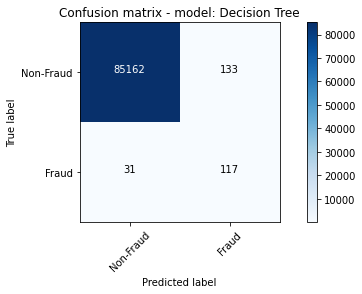

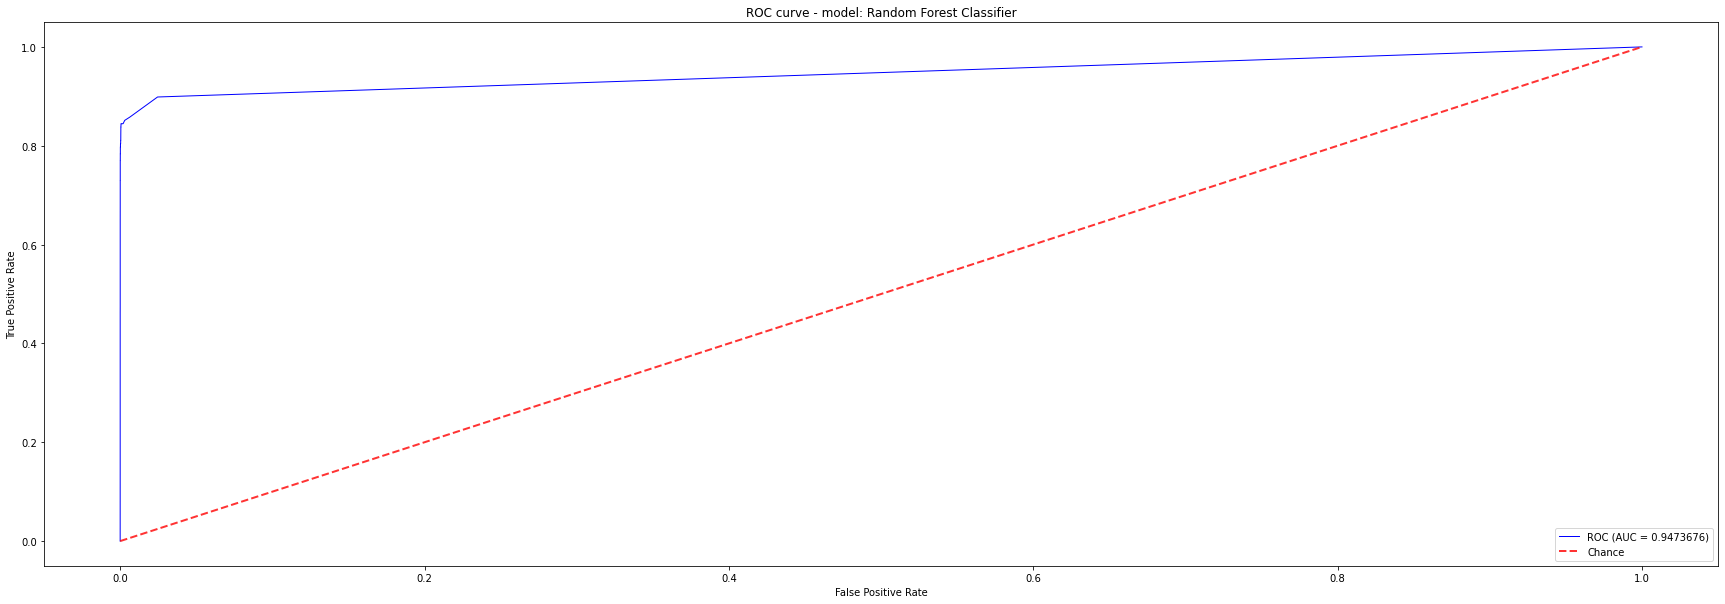

<Figure size 288x216 with 0 Axes>

Accuracy = 99.95%
Precision = 96.46%
Recall = 73.65%
F1-Score = 0.8352490421455939


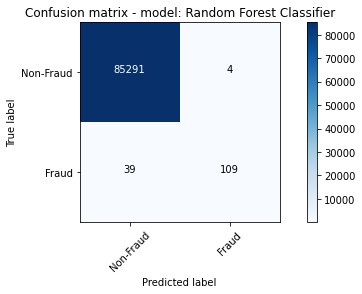

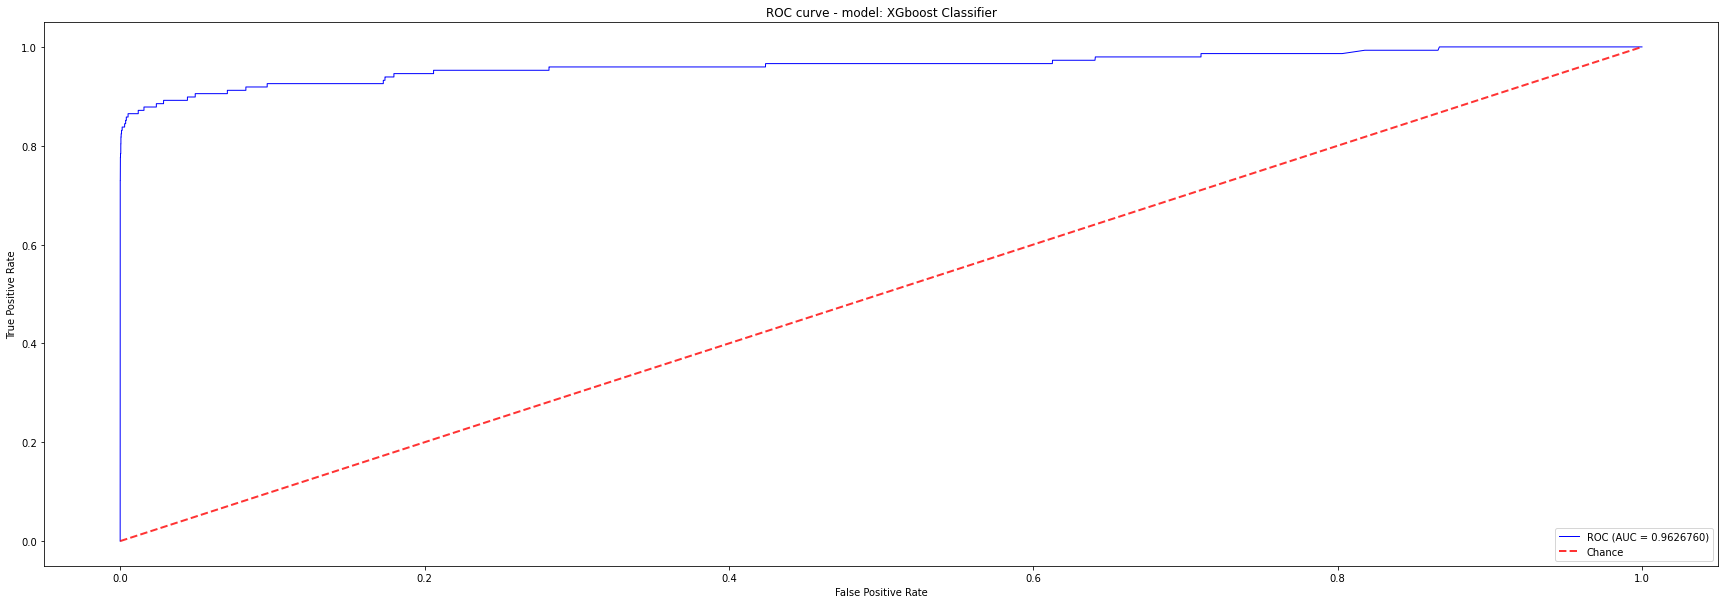

<Figure size 288x216 with 0 Axes>

Accuracy = 99.94%
Precision = 87.79%
Recall = 77.70%
F1-Score = 0.8243727598566308


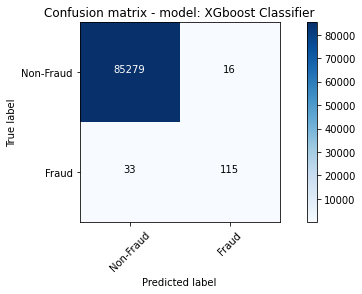

In [301]:
models_ros = []

models_ros.append(('Logistic Regression', LogisticRegression(C=10, random_state=42)))
models_ros.append(('Decision Tree', DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, random_state=42)))
models_ros.append(('Random Forest Classifier',RandomForestClassifier(max_features = 'log2', random_state=42)))
models_ros.append(('XGboost Classifier', XGBClassifier(min_child_weight=1, max_depth=9 ,random_state=42)))

for model in models_ros:
    matrix_and_ROC_curve(model, X_train_ros, y_train_ros, X_test_ros, y_test)

## **Model Building *(Balanced Dataset - SMOTE)***

Synthetic Minority Over-sampling Technique (SMOTE) is much advanced than the Random Over-sampling technique in the way that it doesn't repeat the occurances of the same minorty class data points but generates new synthetic('as suggested in the name') data points the minority class cluster. 

### Performing **SMOTE**

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 42)


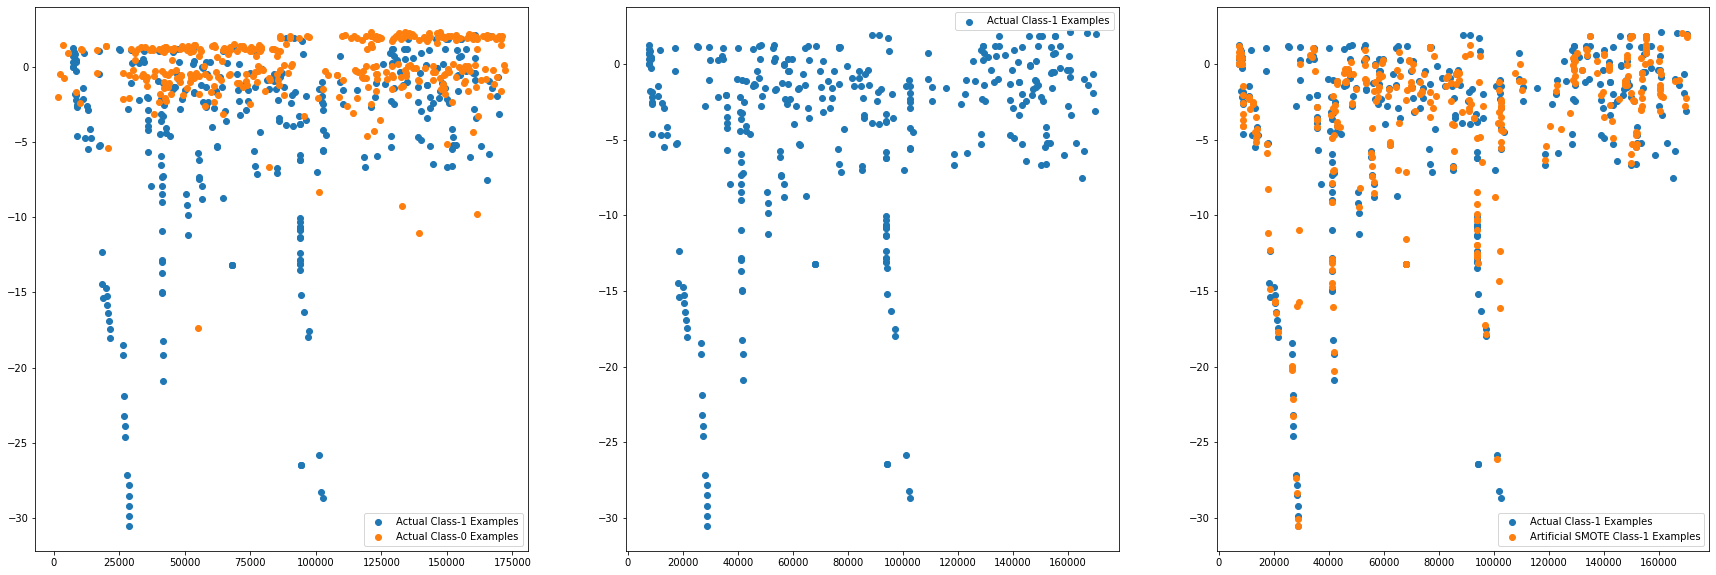

In [104]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [30, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()


plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.show()

### Performing **Power Transformation**

In [105]:
pt = PowerTransformer()
X_train_smote_pt = pt.fit_transform(X_train_smote)
X_test_pt = pt.transform(X_test)
X_train_smote = pd.DataFrame(X_train_smote_pt, columns=X_train.columns)
X_test_smote = pd.DataFrame(X_test_pt, columns=X_test.columns)

In [106]:
X_train_smote.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.293536,0.241511,-0.263182,0.593626,-1.049324,0.546294,0.090118,0.816662,-0.162766,0.430930,0.538769,-0.411504,0.918739,-0.606909,0.977553,-1.013027,0.681005,0.244184,0.300803,0.056393,-0.194216,-0.207941,-0.592623,0.020659,-0.621566,-0.834169,0.324403,0.072343,0.102047,-0.567918
1,1.038603,1.533805,-0.553648,-0.126523,-0.196921,0.557162,-0.133124,0.848418,-0.247726,0.357439,0.866675,-0.355086,0.811038,-1.024041,1.620859,-0.459380,0.439642,0.249346,0.597801,-0.248003,-0.186074,0.006020,0.449183,-0.285206,-0.589535,0.761532,-1.076316,-0.300038,-0.232742,1.020199
2,-0.282107,-0.138685,-2.338048,0.057504,-0.463455,-0.318948,0.021417,1.160043,-0.316530,-0.116518,0.664273,-0.870794,0.769489,1.102564,0.979433,0.946559,-0.091991,0.512108,1.144378,-1.325256,1.900988,0.032694,-1.342513,-1.211566,1.066553,-0.270309,1.742267,-0.562567,0.445332,2.123731
3,-0.762787,0.038052,-0.167454,0.282046,-1.063019,1.588850,2.176738,0.511393,0.022461,0.355191,0.682623,-0.615697,0.449868,0.059930,0.587947,1.704931,0.816139,0.380101,0.661142,0.543523,0.074155,-0.191669,-0.713846,0.137164,2.079137,-1.294560,0.095158,-0.201230,0.508418,-0.789789
4,0.862044,-0.003457,-0.419538,0.655333,-1.678849,1.678975,2.501434,0.432337,0.056841,0.837832,0.515789,-0.838619,0.534526,-0.202784,0.543459,0.467048,0.555427,0.252367,0.352487,-0.670297,0.002225,-0.040538,0.679387,-0.382964,1.660869,-0.180413,1.274672,-0.126552,-0.176963,-0.789789


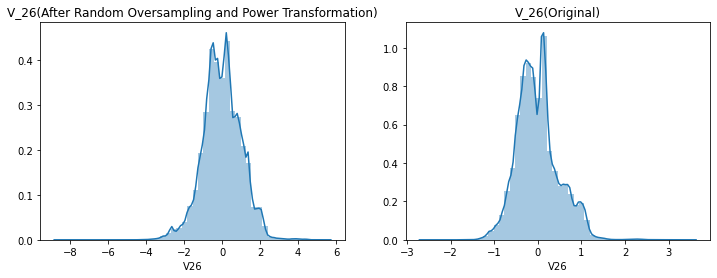

In [107]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(X_train_smote.V26, hist = True)
plt.title('V_26(After Random Oversampling and Power Transformation)')

plt.subplot(1,2,2)
sns.distplot(data.V26, hist = True)
plt.title('V_26(Original)')

plt.show()

### Hypertuning a **Logistic Regression** Classifier

In [58]:
# Using RandomizedSearchCV to Hypertune the model.

cv = StratifiedKFold(n_splits=5, random_state = 42)

logreg_smote = LogisticRegression()

hyper_params = {'C': [0.001, 0.01, 0.1, 1, 10,100]}
n_hp = len(hyper_params) 

logreg_smote_cv = RandomizedSearchCV(logreg_smote, hyper_params, scoring= 'roc_auc', cv = cv, return_train_score=True)
logreg_smote_cv.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring

Best Parameters: {'C': 100}
Best ROC-AUC Score: 0.989595685902634
   rank_test_score  mean_train_score param_C
0                6          0.988563   0.001
1                5          0.989423    0.01
2                4          0.989601     0.1
3                3          0.989614       1
4                2          0.989615      10
5                1          0.989615     100


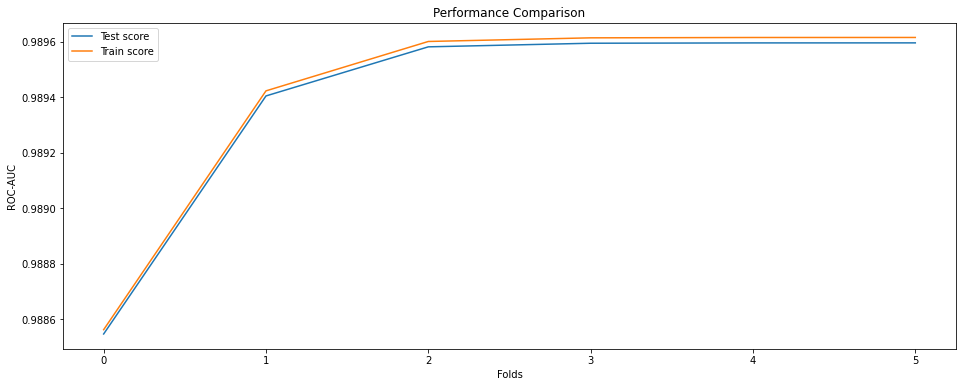

In [59]:
hypertuning_results(logreg_smote_cv,n_hp)

### Hypertuning a **Decision Tree** Classifier

In [60]:
# Using RandomizedSearchCV to Hypertune the model.

cv = StratifiedKFold(n_splits=5, random_state = 42)

dtree_smote = DecisionTreeClassifier()

depths = np.arange(1,20)
n_leafs = [1,5,10,20,50,100]

hyper_params = {'max_depth':depths, 'min_samples_leaf': n_leafs}
n_hp = len(hyper_params)

dtree_smote_cv = RandomizedSearchCV(dtree_smote, hyper_params, scoring = 'roc_auc', cv = cv, return_train_score=True)
dtree_smote_cv.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
    

Best Parameters: {'min_samples_leaf': 50, 'max_depth': 17}
Best ROC-AUC Score: 0.9989943901367336
   mean_test_score  mean_train_score param_min_samples_leaf param_max_depth
0         0.998350          0.999585                      5              14
1         0.981029          0.981227                     50               5
2         0.998876          0.999458                    100              17
3         0.998636          0.999690                     10              15
4         0.998362          0.999836                      5              18
5         0.998518          0.999810                     10              17
6         0.920491          0.920519                      1               1
7         0.998934          0.999480                    100              18
8         0.969801          0.969858                     10               3
9         0.998994          0.999716                     50              17


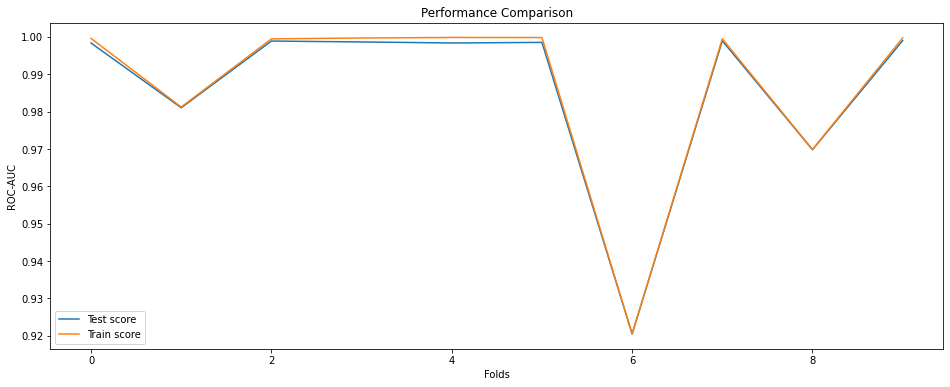

In [84]:
hypertuning_results(dtree_smote_cv,n_hp)

### Hypertuning a **Random Forest** Classifier 

In [57]:
cv = StratifiedKFold(n_splits = 3, random_state=42)

rf_clf_smote = RandomForestClassifier()

n_est = [100,200]
max_feat = ['auto','log2']

hyper_params = {'n_estimators':n_est, 'max_features':max_feat}
n_hp = len(hyper_params)

rf_clf_smote_cv = RandomizedSearchCV(rf_clf_smote, hyper_params, scoring = 'f1', cv=cv, return_train_score=True)
rf_clf_smote_cv.fit(X_train_smote, y_train_smote)

In [57]:
hypertuning_results(rf_clf_smote_cv,n_hp)

### Hypertuning an **XGBoost** Classifier

In [95]:
cv = StratifiedKFold(n_splits = 3, random_state = 42)

xgb_clf_smote = XGBClassifier(learning_rate=0.1, objective='binary:logistic', nthread=4)

depths = range(3,10,2)
child_weight = range(1,6,2)

hyper_params = {'max_depth': depths, 'min_child_weight': child_weight}
n_hp = len(hyper_params)

xgb_clf_smote_cv = RandomizedSearchCV(xgb_clf_smote, hyper_params, scoring = 'roc_auc', return_train_score = True, n_jobs = -1)
xgb_clf_smote_cv.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=4,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

Best Parameters: {'min_child_weight': 3, 'max_depth': 9}
Best ROC-AUC Score: 0.9999849789477109
   mean_test_score  mean_train_score param_min_child_weight param_max_depth
0         0.999961          0.999987                      5               7
1         0.999965          0.999989                      3               7
2         0.999985          0.999998                      3               9
3         0.998746          0.998816                      5               3
4         0.999873          0.999905                      3               5
5         0.999861          0.999896                      5               5
6         0.999968          0.999992                      1               7
7         0.999982          1.000000                      1               9
8         0.999872          0.999902                      1               5
9         0.999982          0.999997                      5               9


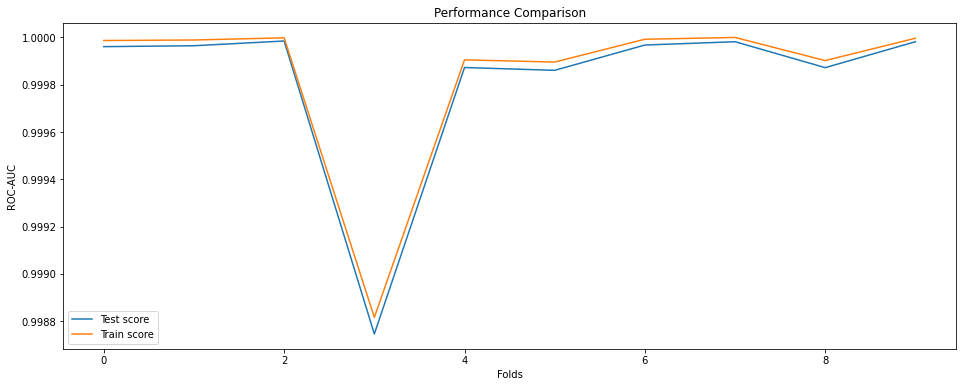

In [96]:
hypertuning_results(xgb_clf_smote_cv,n_hp)

## **Model Evaluation** *(SMOTE)*

In [65]:
models_smote = []

models_smote.append(('Logistic Regression', LogisticRegression(C=100, random_state=42)))
models_smote.append(('Decision Tree', DecisionTreeClassifier(max_depth=17, min_samples_leaf=50, random_state=42)))
models_smote.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=100, max_features='log2', random_state = 42)))
models_smote.append(('XGboost Classifier', XGBClassifier(min_child_weight=3, max_depth=9 ,random_state=42)))

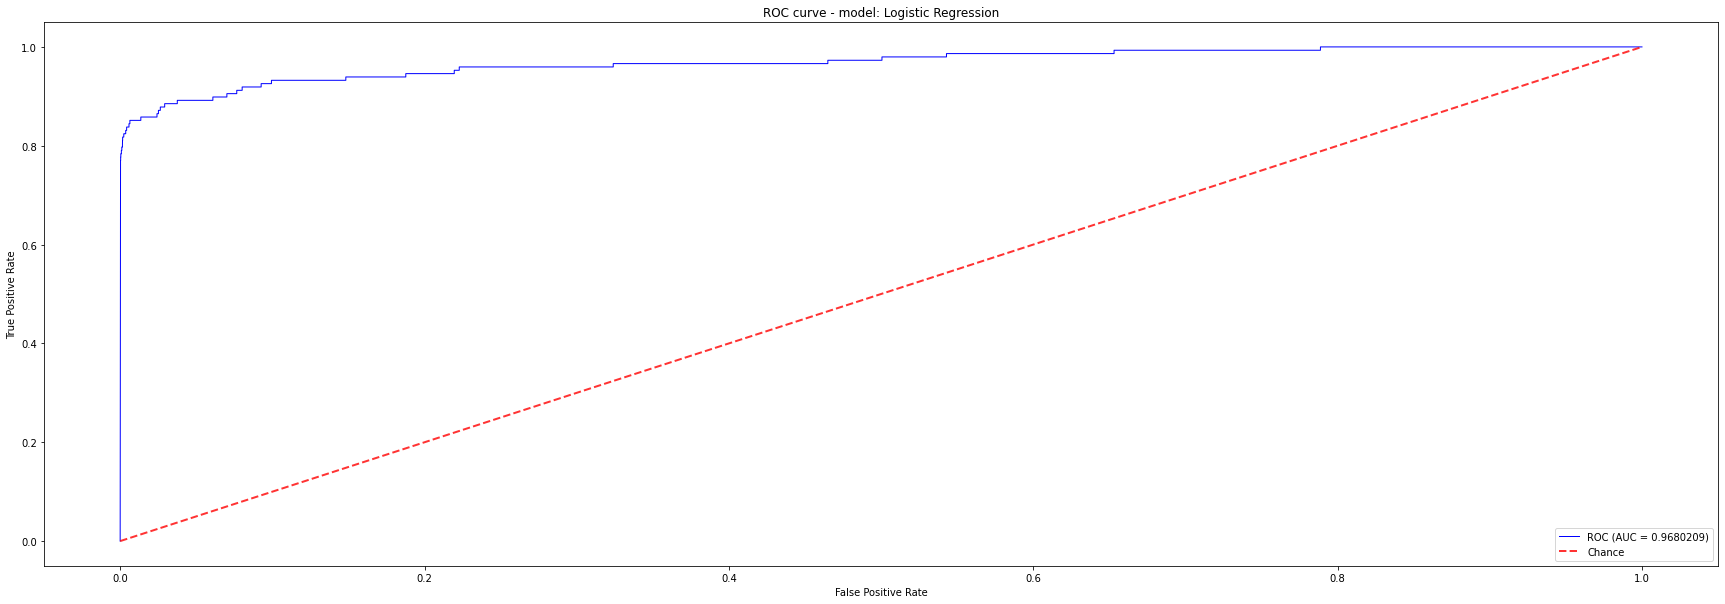

<Figure size 288x216 with 0 Axes>

Accuracy = 98.80%
Precision = 11.19%
Recall = 85.14%
F1-Score = 0.1978021978021978


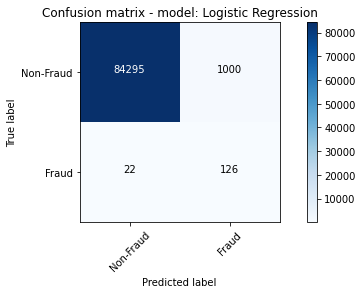

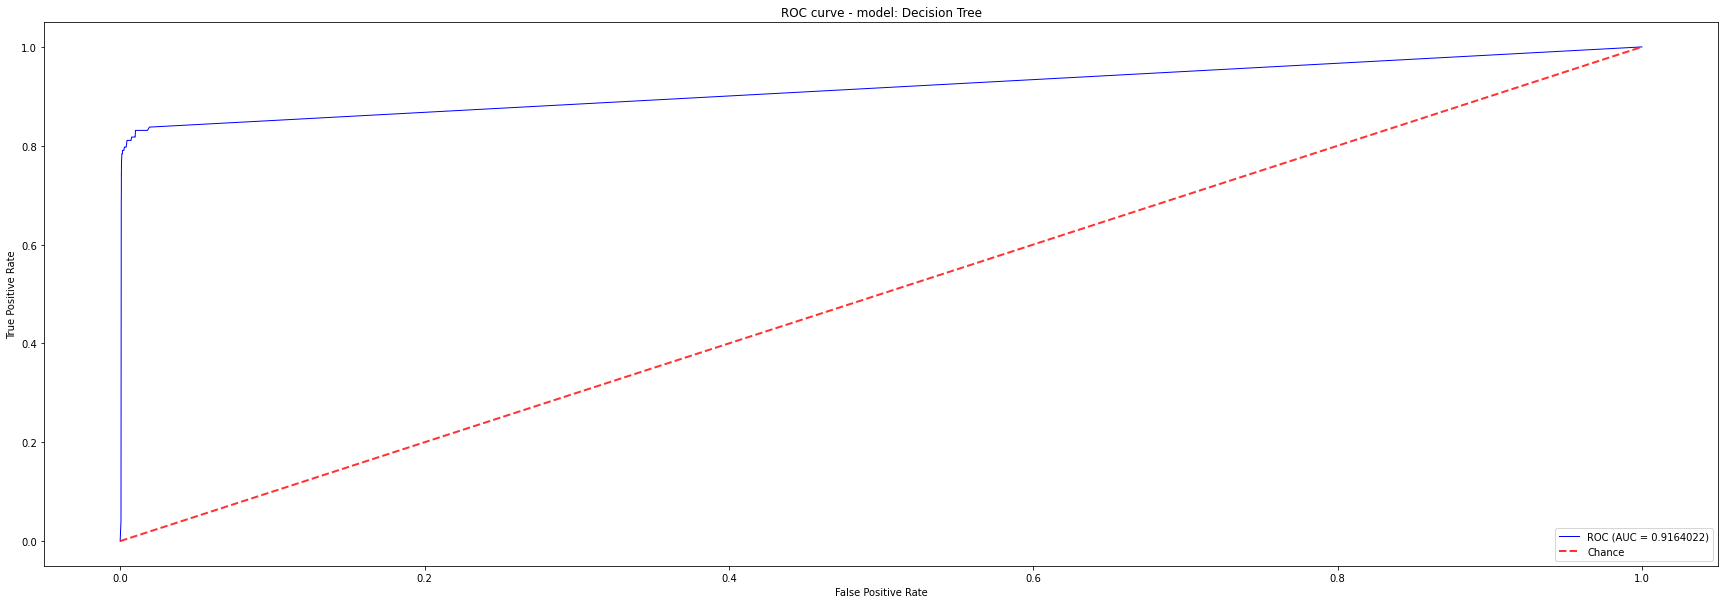

<Figure size 288x216 with 0 Axes>

Accuracy = 99.26%
Precision = 16.48%
Recall = 81.08%
F1-Score = 0.273972602739726


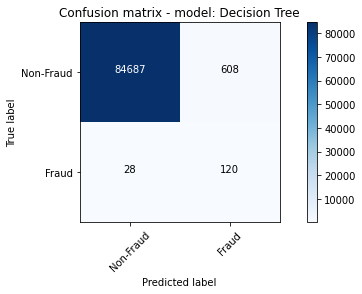

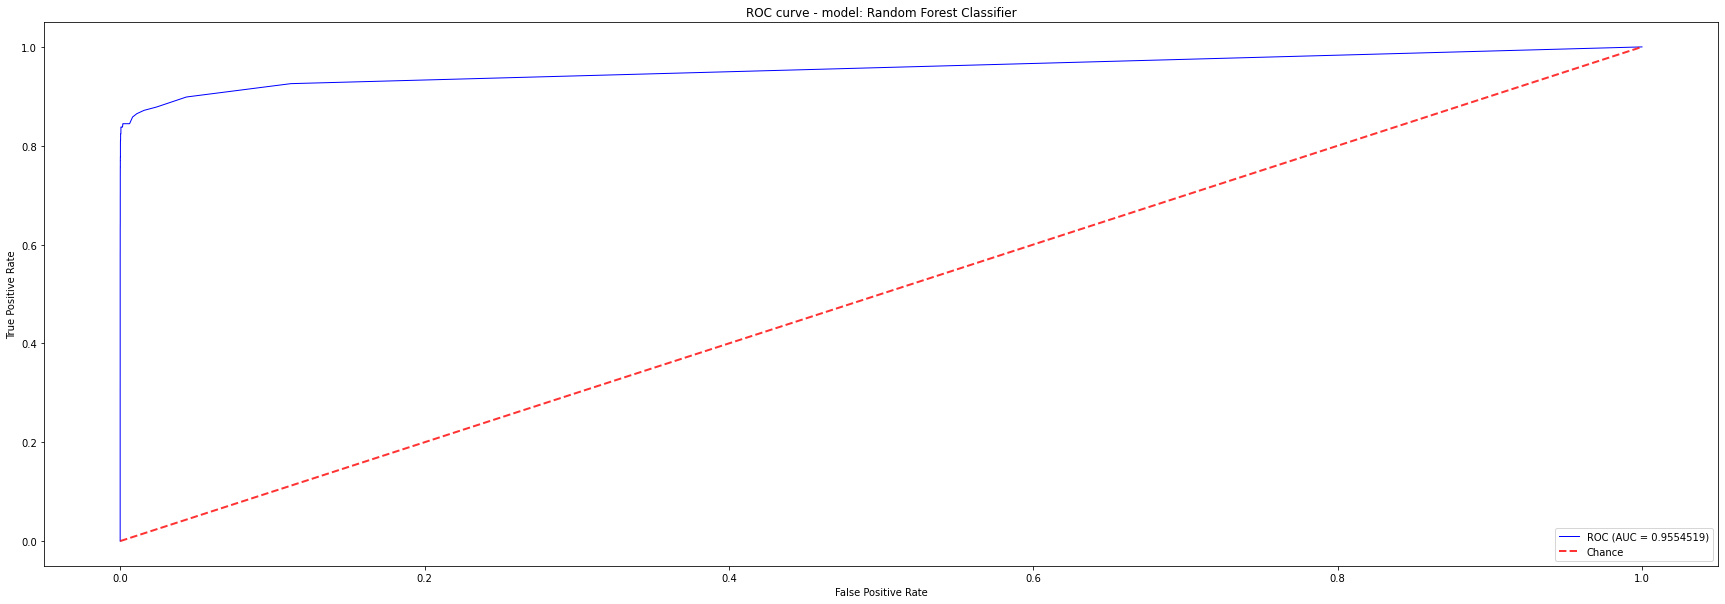

<Figure size 288x216 with 0 Axes>

Accuracy = 99.95%
Precision = 88.24%
Recall = 81.08%
F1-Score = 0.8450704225352113


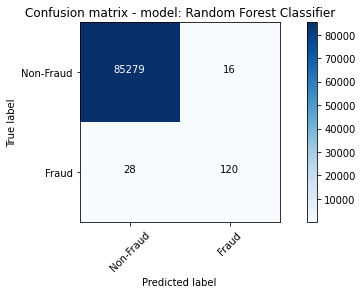

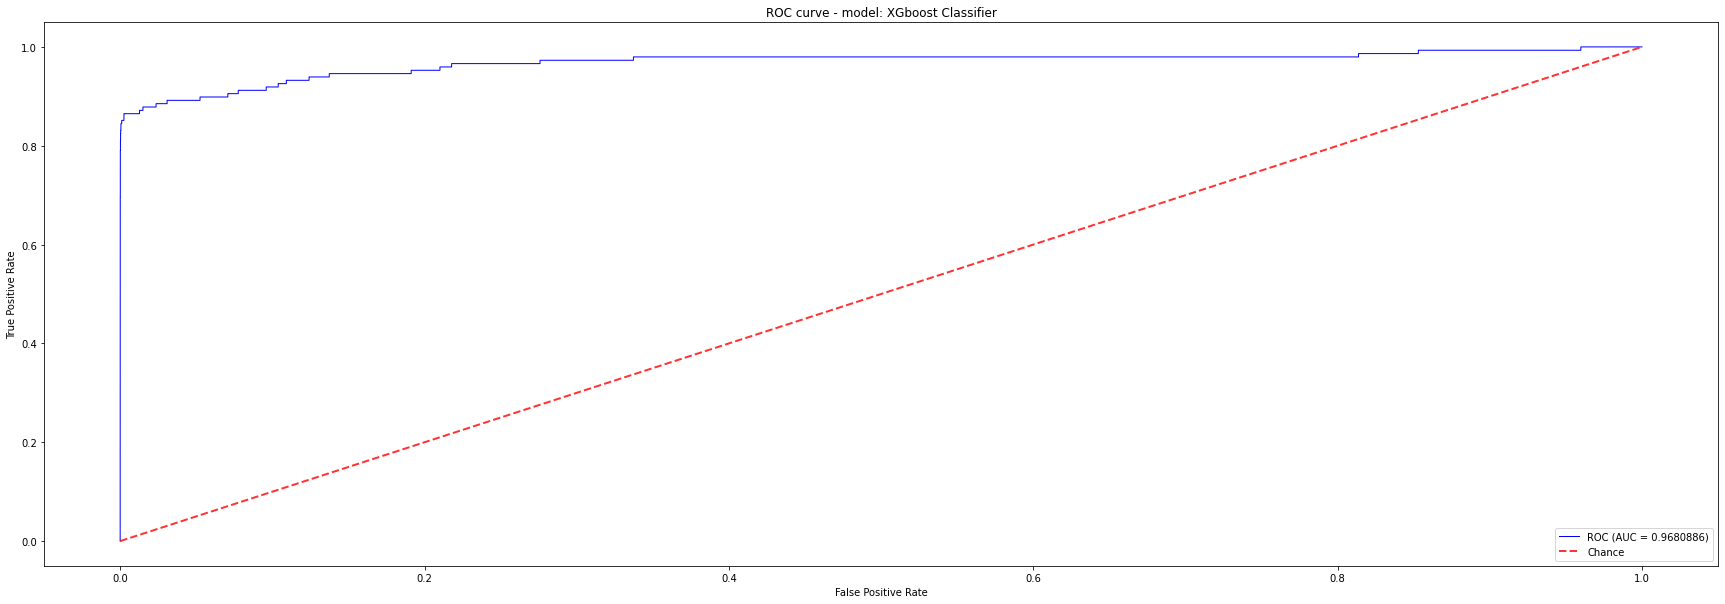

<Figure size 288x216 with 0 Axes>

Accuracy = 99.93%
Precision = 78.34%
Recall = 83.11%
F1-Score = 0.8065573770491803


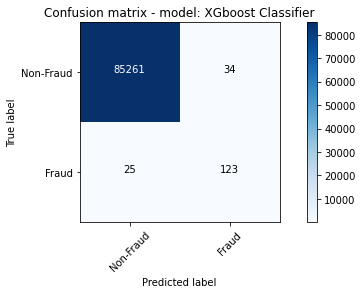

In [66]:
for model in models_smote:
    matrix_and_ROC_curve(model, X_train_smote, y_train_smote, X_test_smote, y_test)

## **Model Building *(Balanced Dataset - ADASYN)***

### Performing **ADASYN**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 100)

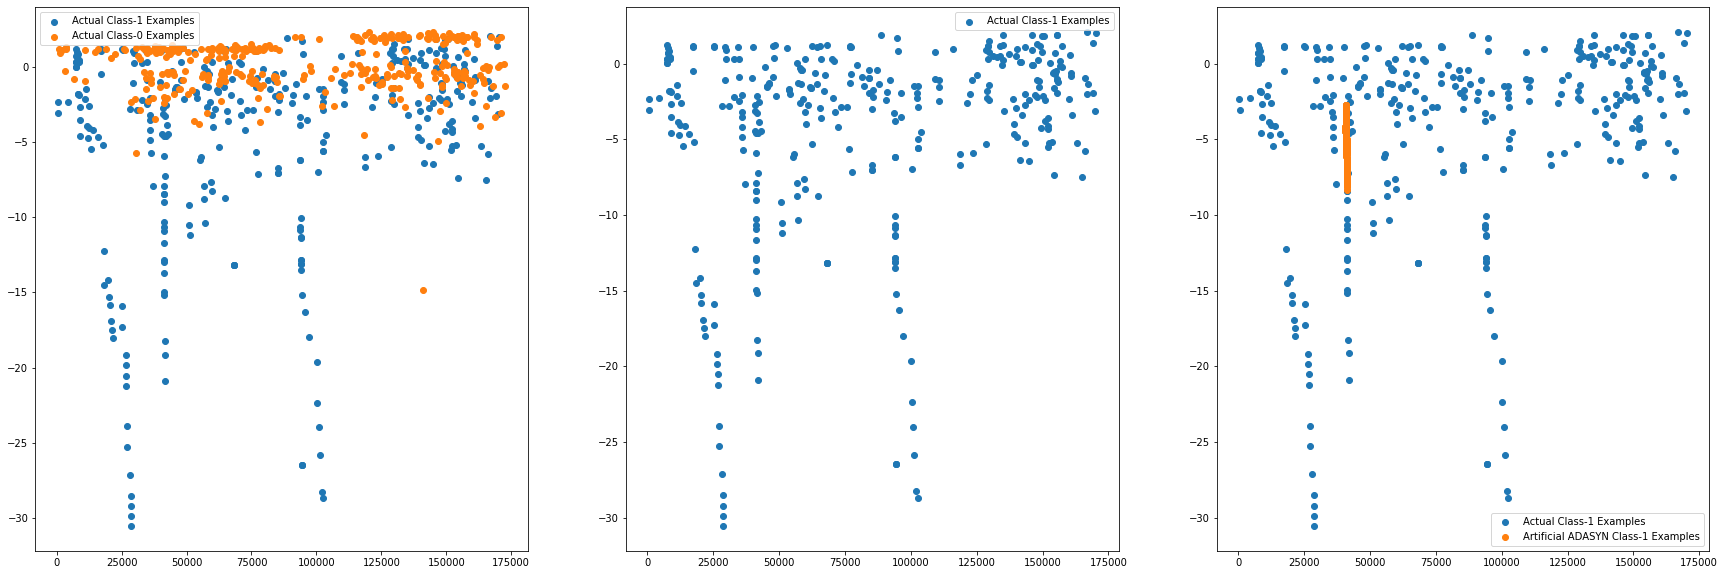

In [72]:
ada = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [30, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.show()

In [73]:
# Performing a slight correction to the y_train

print(Counter(y_train_adasyn))
print(len(X_train_adasyn))

Counter({0: 199020, 1: 198979})
397999


### Performing **Power Transformation**

In [74]:
pt = PowerTransformer()
X_train_adasyn_pt = pt.fit_transform(X_train_adasyn)
X_test_pt = pt.transform(X_test)
X_train_adasyn = pd.DataFrame(X_train_adasyn_pt, columns=X_train.columns)
X_test_adasyn = pd.DataFrame(X_test_pt, columns= X_test.columns)

In [75]:
X_train_adasyn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.060314,1.815963,-0.503992,0.121584,-0.482590,0.143947,-0.266130,0.490083,-0.176805,1.002845,0.656823,-1.293336,0.518778,-1.147193,1.053114,0.230920,0.432087,0.407499,-0.180405,-0.124864,-0.502924,-0.224400,-0.782548,0.371942,-0.025205,-0.646958,0.410716,-0.335272,-0.211282,-1.276947
1,0.595299,0.306281,-0.096817,0.349918,-0.943670,0.694400,-0.027427,0.964647,-0.160123,0.394767,0.287836,-0.998759,0.952797,1.103872,0.230975,-0.390334,0.712822,0.602738,0.080702,-0.415398,-0.088016,-0.239103,-0.759215,0.060629,1.270657,-0.688903,0.204083,0.045965,0.154306,-1.004405
2,0.859533,1.911810,-0.379293,-0.159722,-0.696210,0.594028,-0.401679,0.854896,-0.261683,0.517656,0.601971,-0.953048,1.345122,1.209960,1.067687,0.298310,0.130762,0.333845,-0.099114,-0.085530,-0.312187,-0.027024,0.575857,-0.052070,1.806389,0.803159,0.405680,-0.343918,-0.226334,-0.773729
3,-1.133852,0.078111,-0.417747,1.681853,-1.124633,0.091893,0.441444,0.400485,-0.078209,-0.389227,0.861590,0.139290,0.495173,-0.007523,0.793217,0.807267,0.971864,0.790260,-0.367805,1.222956,0.123064,-0.034235,0.185913,-0.038320,0.096355,-0.599328,-0.735718,-0.098538,0.196934,-0.038726
4,1.278727,0.045396,0.125752,0.117433,-0.235858,0.812526,0.082474,0.997450,-0.063530,0.024025,0.294274,-1.277087,0.519165,0.016135,0.391553,-0.206247,0.182486,1.265772,0.612950,0.319829,-0.148468,-0.068055,0.333133,-0.280211,1.069135,0.080602,-1.028883,0.182990,0.479199,-0.620120


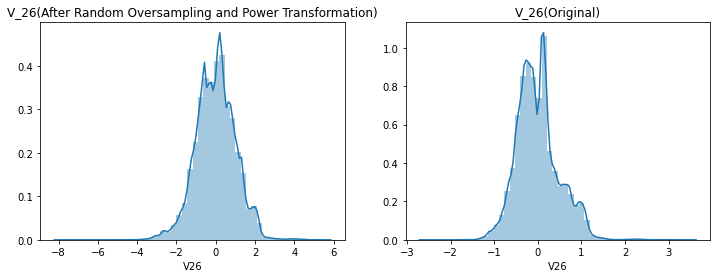

In [76]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(X_train_adasyn.V26, hist = True)
plt.title('V_26(After Random Oversampling and Power Transformation)')

plt.subplot(1,2,2)
sns.distplot(data.V26, hist = True)
plt.title('V_26(Original)')

plt.show()

### Hypertuning a **Logistic Regression** Classifier

In [77]:
# Using RandomizedSearchCV to Hypertune the model.

cv = StratifiedKFold(n_splits=5, random_state = 42)

logreg_adasyn = LogisticRegression()

hyper_params = {'C': [0.001, 0.01, 0.1, 1, 10,100]}
n_hp = len(hyper_params) 

logreg_adasyn_cv = RandomizedSearchCV(logreg_adasyn, hyper_params, scoring= 'roc_auc', cv = cv, return_train_score=True)
logreg_adasyn_cv.fit(X_train_adasyn,y_train_adasyn)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring

Best Parameters: {'C': 100}
Best ROC-AUC Score: 0.9487785851814209
   mean_test_score  mean_train_score param_C
0         0.945010          0.963473   0.001
1         0.947694          0.966679    0.01
2         0.948587          0.967535     0.1
3         0.948741          0.967704       1
4         0.948761          0.967723      10
5         0.948779          0.967727     100


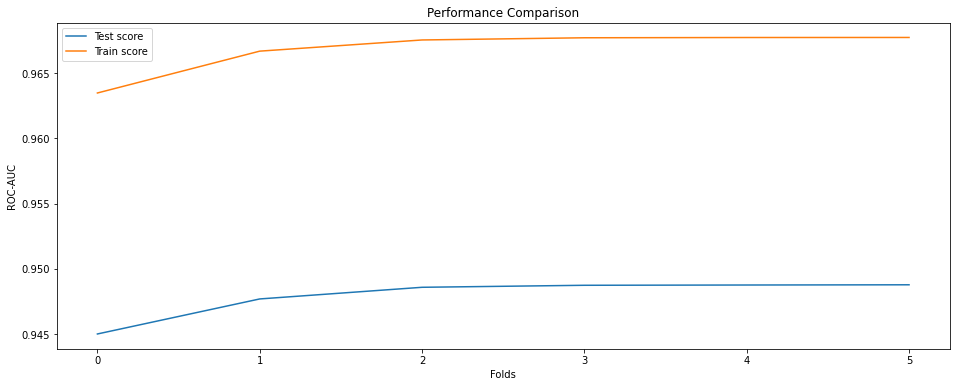

In [81]:
hypertuning_results(logreg_adasyn_cv,n_hp)

### Hypertuning a **Decision Tree** Classifier

In [48]:
# Using RandomizedSearchCV to Hypertune the model.

cv = StratifiedKFold(n_splits=5, random_state = 42)

dtree_adasyn = DecisionTreeClassifier()

depths = np.arange(1,20)
n_leafs = [1,5,10,20,50,100]

hyper_params = {'max_depth':depths, 'min_samples_leaf': n_leafs}
n_hp = len(hyper_params)

dtree_adasyn_cv = RandomizedSearchCV(dtree_adasyn, hyper_params, scoring = 'roc_auc', cv = cv, return_train_score=True)
dtree_adasyn_cv.fit(X_train_adasyn, y_train_adasyn)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
    

Best Parameters: {'min_samples_leaf': 100, 'max_depth': 7}
Best ROC-AUC Score: 0.9466528469448701
   mean_test_score  mean_train_score param_min_samples_leaf param_max_depth
0         0.937294          0.958378                      5               4
1         0.942408          0.993598                     20              11
2         0.946653          0.984799                    100               7
3         0.937060          0.996324                      5              14
4         0.921897          0.938320                      5               3
5         0.942026          0.984936                     20               7
6         0.940038          0.997750                     10              18
7         0.940927          0.997902                     20              18
8         0.936914          0.995086                      5              12
9         0.937716          0.995756                      5              13


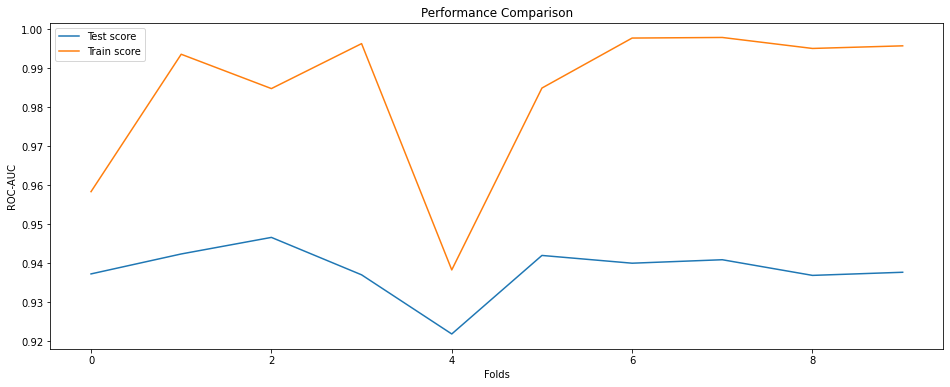

In [49]:
hypertuning_results(dtree_adasyn_cv,n_hp)

### Hypertuning a **Random Forest** Classifier 

In [ ]:
cv = StratifiedKFold(n_splits = 3, random_state=42)

rf_clf_adasyn = RandomForestClassifier()

n_est = [100,200]
max_feat = ['auto','log2']

hyper_params = {'n_estimators':n_est, 'max_features':max_feat}
n_hp = len(hyper_params)

rf_clf_adasyn_cv = RandomizedSearchCV(rf_clf_adasyn, hyper_params, scoring = 'f1', cv=cv, return_train_score=True)
rf_clf_adasyn_cv.fit(X_train_adasyn, y_train_adasyn)

Best Parameters: {'n_estimators': 100, 'max_features': 'log2'}
Best Score: 0.9999371968428369
   mean_test_score  mean_train_score param_n_estimators param_max_features
0         0.999935               1.0                100               auto
1         0.999932               1.0                200               auto
2         0.999937               1.0                100               log2
3         0.999932               1.0                200               log2


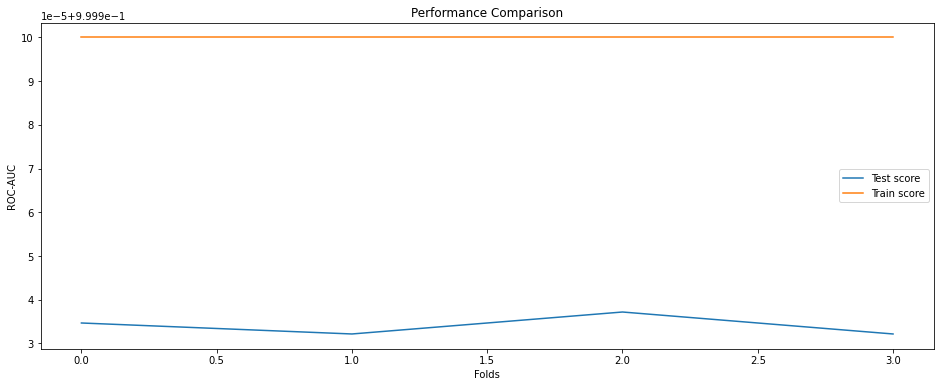

In [ ]:
hypertuning_results(rf_clf_adasyn_cv,n_hp)

### Hypertuning an **XGBoost** Classifier

In [103]:
cv = StratifiedKFold(n_splits = 3, random_state = 42)

xgb_clf_adasyn = XGBClassifier(learning_rate=0.1, objective='binary:logistic', nthread=4)

depths = range(3,10,2)
child_weight = range(1,6,2)

hyper_params = {'max_depth': depths, 'min_child_weight': child_weight}
n_hp = len(hyper_params)

xgb_clf_adasyn_cv = RandomizedSearchCV(xgb_clf_adasyn, hyper_params, scoring = 'roc_auc', return_train_score = True, n_jobs = -1)
xgb_clf_adasyn_cv.fit(X_train_adasyn, y_train_adasyn)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=4,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

Best Parameters: {'min_child_weight': 3, 'max_depth': 9}
Best ROC-AUC Score: 0.9979168144811753
   mean_test_score  mean_train_score param_min_child_weight param_max_depth
0         0.990266          0.998033                      5               3
1         0.996778          0.999992                      1               7
2         0.997776          1.000000                      1               9
3         0.997917          1.000000                      3               9
4         0.994359          0.999838                      5               5
5         0.994916          0.999865                      1               5
6         0.990111          0.997914                      3               3
7         0.995810          0.999987                      3               7
8         0.989925          0.997992                      1               3
9         0.996022          0.999982                      5               7


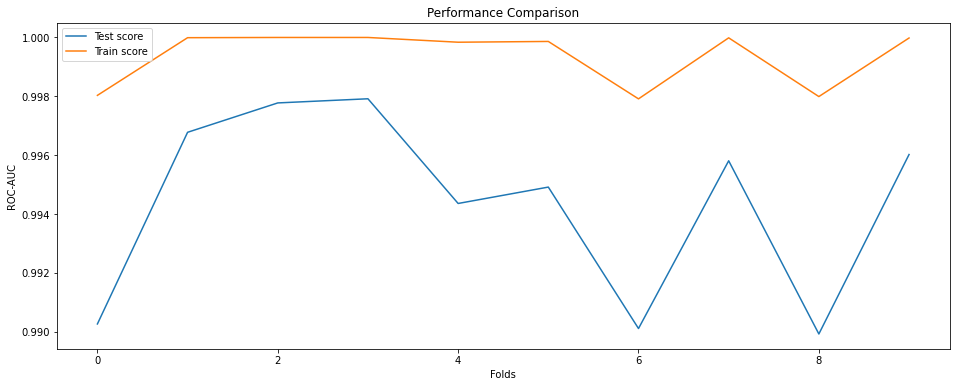

In [104]:
hypertuning_results(xgb_clf_adasyn_cv,n_hp)

## **Model Evaluation** *(ADASYN)*

In [77]:
models_adasyn = []

models_adasyn.append(('Logistic Regression', LogisticRegression(C=10, random_state=42)))
models_adasyn.append(('Decision Tree', DecisionTreeClassifier(max_depth=17, min_samples_leaf=50, random_state=42)))
models_adasyn.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=100, max_features='log2', random_state = 42)))
models_adasyn.append(('XGboost Classifier', XGBClassifier(min_child_weight=3, max_depth=9, random_state = 42)))


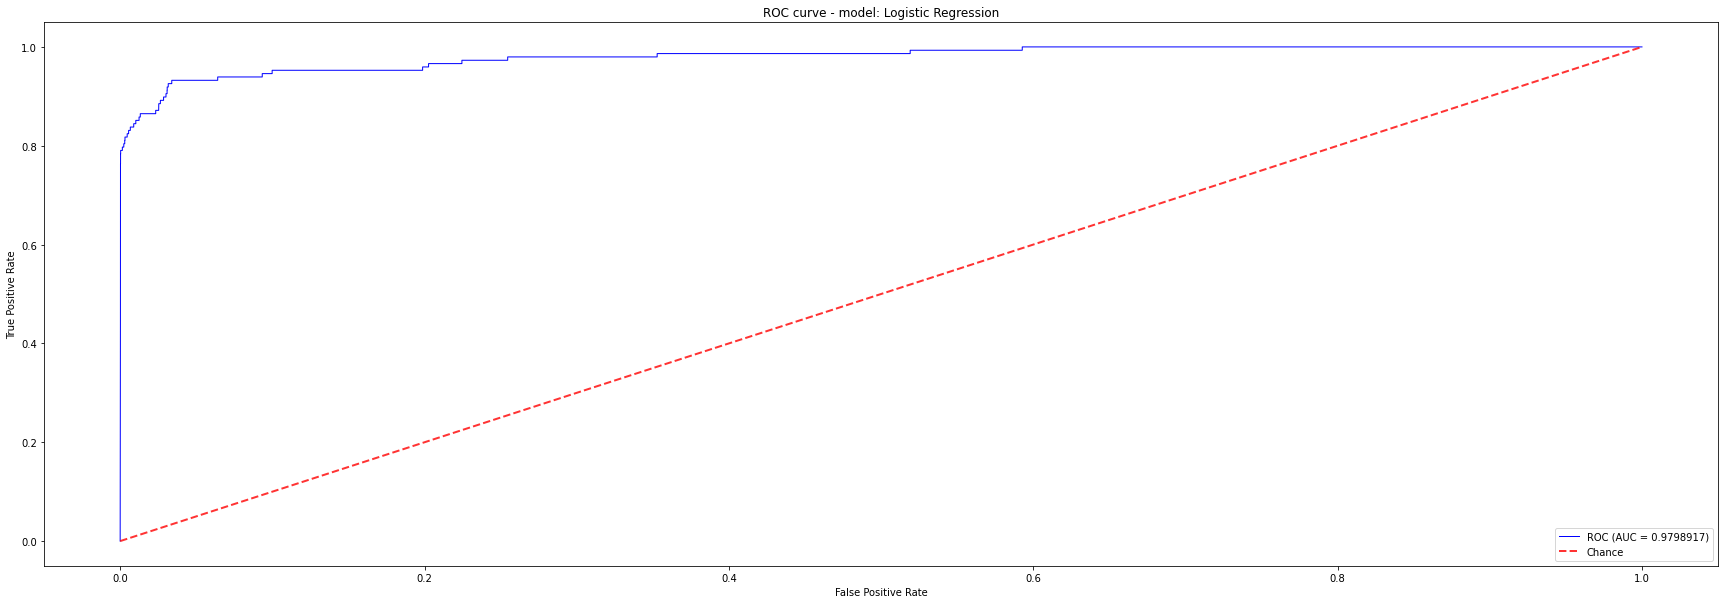

<Figure size 288x216 with 0 Axes>

Accuracy = 98.85%
Precision = 11.61%
Recall = 85.14%
F1-Score = 0.20437956204379565


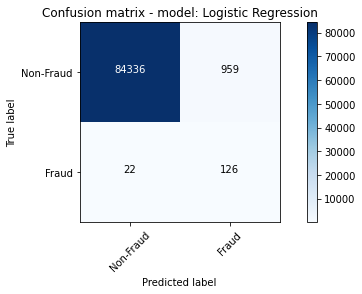

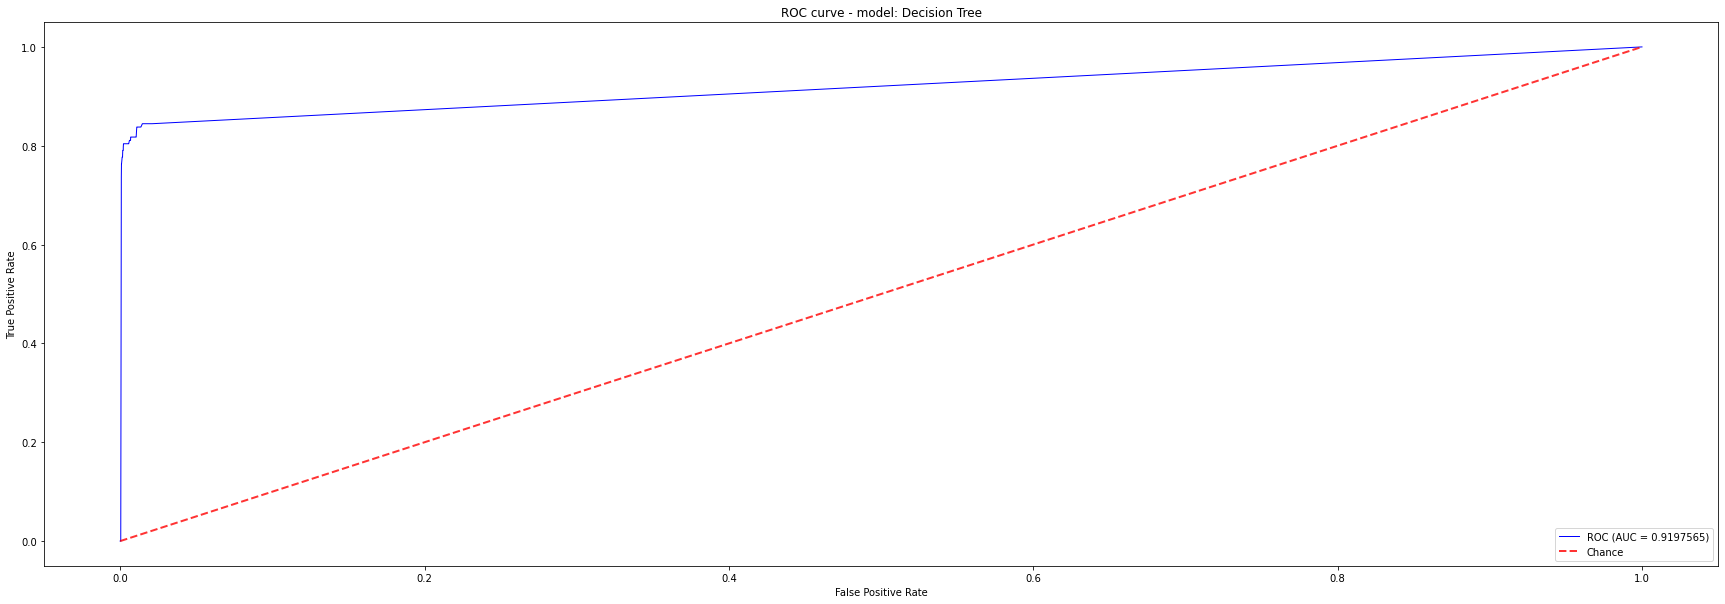

<Figure size 288x216 with 0 Axes>

Accuracy = 99.20%
Precision = 15.61%
Recall = 81.76%
F1-Score = 0.26218851570964247


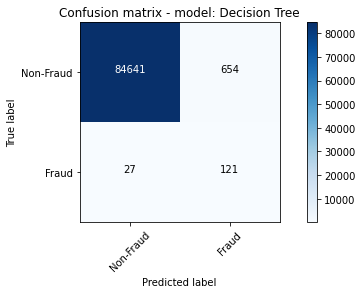

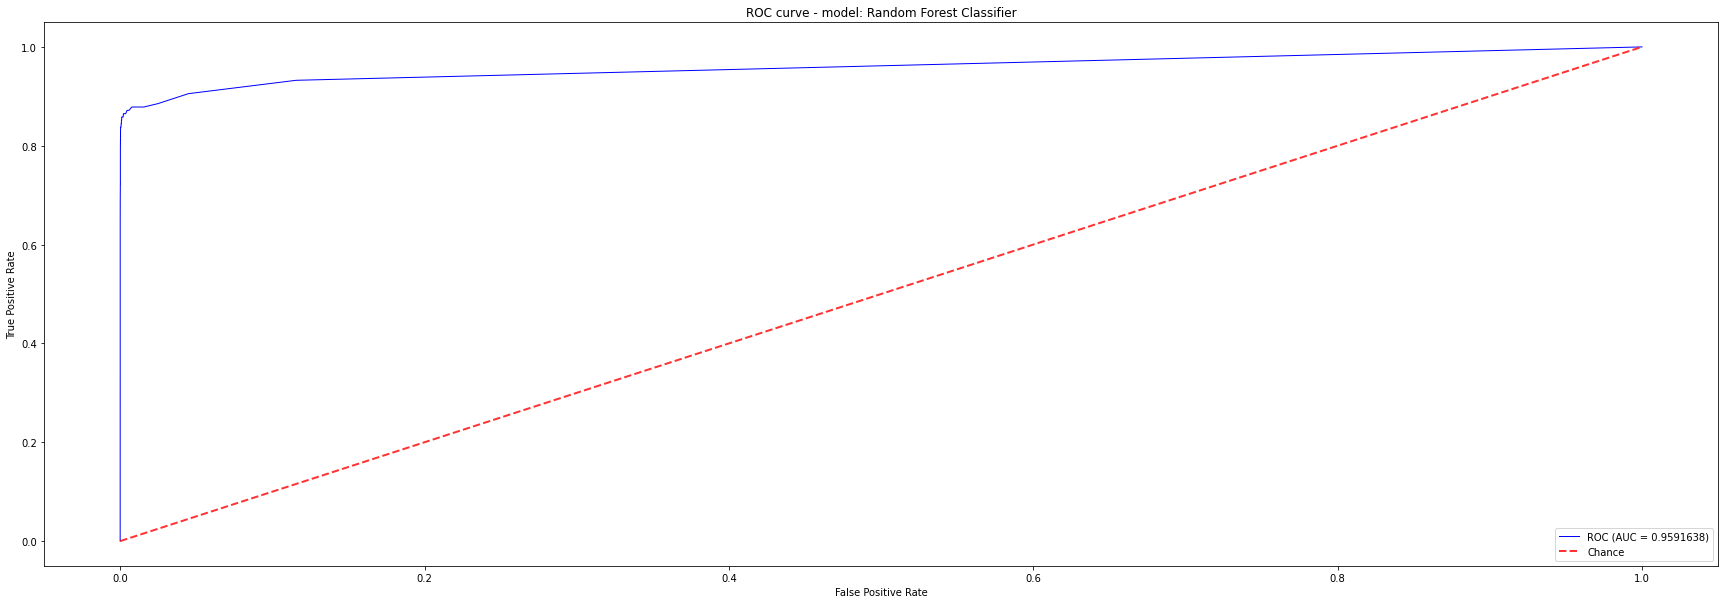

<Figure size 288x216 with 0 Axes>

Accuracy = 99.95%
Precision = 86.52%
Recall = 82.43%
F1-Score = 0.8442906574394465


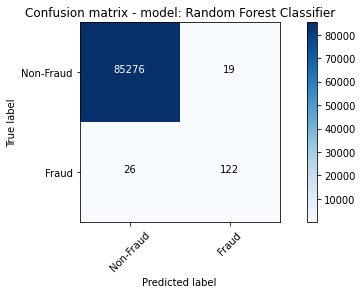

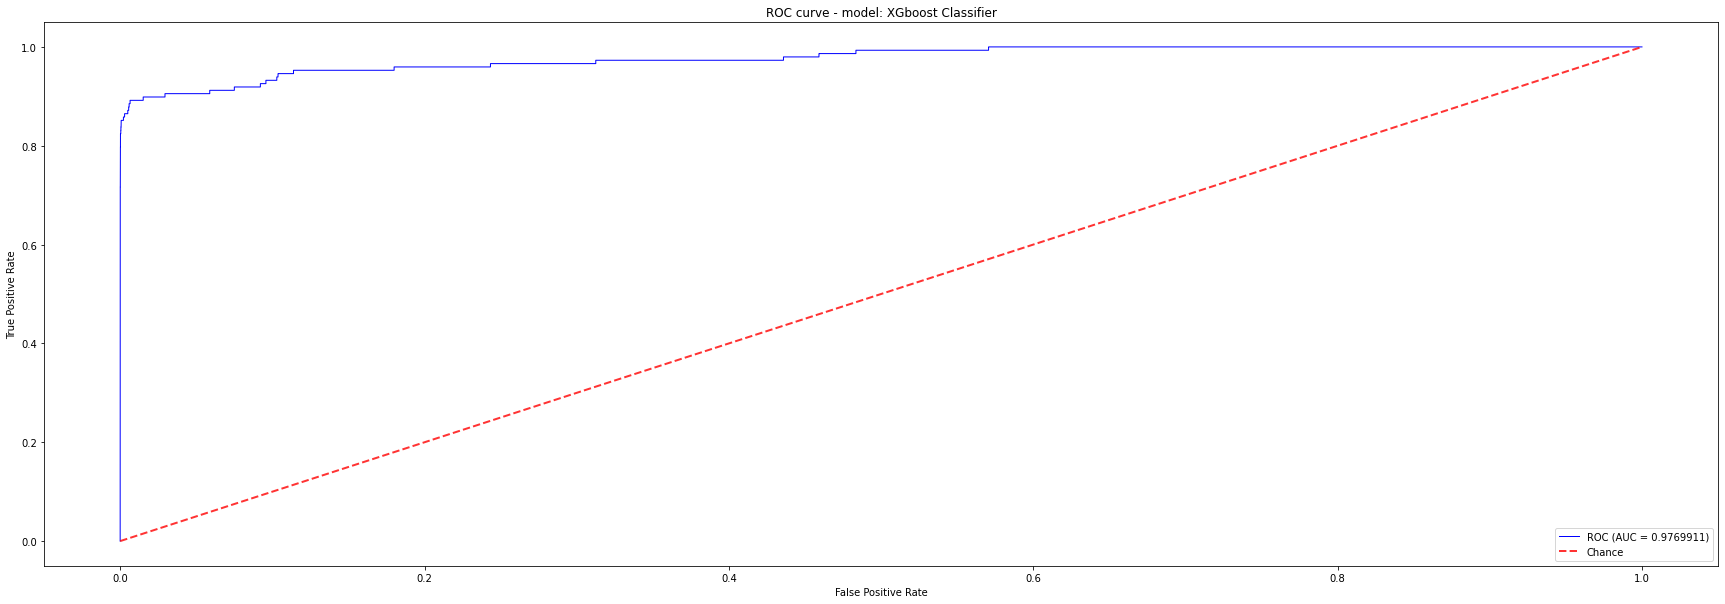

<Figure size 288x216 with 0 Axes>

Accuracy = 99.91%
Precision = 71.68%
Recall = 83.78%
F1-Score = 0.7725856697819314


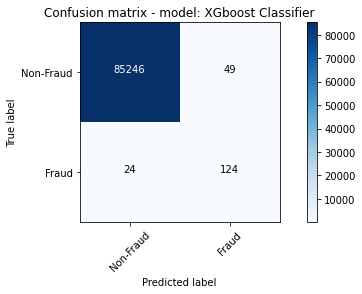

In [78]:
for model in models_adasyn:
    matrix_and_ROC_curve(model, X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test)

## **Evaluation Results**

### ***Classification on Imbalanced Data***

> Logistic Regression
* Precision = 85.19%
* Recall = 62.16%
* F1 Score = 0.72
* ROC Cut-off = 0.97

> Decision Tree
* Precision = 79.65%
* Recall = 60.81%
* F1 Score = 0.69
* ROC Cut-off = 0.92

> Random Forest Classifier
* Precision = 84.21%
* Recall = 54.05%
* F1 Score = 0.66
* ROC Cut-off = 0.97

> XGBoost Classifier
* Precision = 92.56%
* Recall = 75.68%
* F1 Score = 0.83
* ROC Cut-off = 0.97

### ***Classification after Random Over-Sampling***

> **Logistic Regression**
* Precision = 5.63%
* Recall = 87.16%
* F1 Score = 0.10
* ROC Cut-off = 0.97

> **Decision Tree**
* Precision = 46.80%
* Recall = 79.05%
* F1-Score = 0.59
* ROC Cut-off  = 0.89

> **Random Forest Classifier**
* Precision = 96.46%
* Recall = 73.65%
* F1-Score = 0.83
* ROC Cut-off = 0.95

> **XGBoost Classifier**
* Precision = 87.79%
* Recall = 77.70%
* F1-Score = 0.82
* ROC Cut-off = 0.96

### ***Classification after SMOTE***

> **Logistic Regression**
* Precision = 11.19%
* Recall = 85.14%
* F1-Score = 0.20
* ROC Cut-off = 0.97

> **Decision Tree**
* Precision = 16.48%
* Recall = 81.08%
* F1-Score = 0.27
* ROC Cut-off  = 0.92

> **Random Forest Classifier**
* Precision = 88.24%
* Recall = 81.08%
* F1-Score = 0.84
* ROC Cut-off = 0.95

> **XGBoost Classifier**
* Precision = 78.34%
* Recall = 83.11%
* F1-Score = 0.80
* ROC Cut-off = 0.97

### ***Classification after ADASYN***

> **Logistic Regression**
* Precision = 11.61%
* Recall = 85.14%
* F1-Score = 0.20
* ROC Cut-off = 0.98

> **Decision Tree**
* Precision = 15.61%
* Recall = 81.76%
* F1-Score = 0.26
* ROC Cut-off  = 0.92

> **Random Forest Classifier**
* Precision = 86.52%
* Recall = 82.43%
* F1-Score = 0.84
* ROC Cut-off = 0.96

> **XGBoost Classifier**
* Precision = 71.68%
* Recall = 83.78%
* F1-Score = 0.77
* ROC Cut-off = 0.98

## **Model Selection**


It is correct to say that model selection is dependent on the metrics of the model, but it's even more important for the metrics to resonate with the resources and the scale of the business. The model has to be carefully chosen to fit the required problem at hand.


---


1. **Credit Card Fraud Detection - Small Scale Bank**
 > A small scale financial institution usually provides low credits to its customers. Given the scale, the resources available with the bank are not as much as with a larger scale bank, so the service to connect with the customer to cross check the legitimacy of the transaction are less. Hence, we can conclude that this type of bank will be better off working with a model with higher precision than recall to substitute the cost of cross-checking the results of the model.

 > ***Random Forest CLassifier (Random Over-Sampling)***


---


2. **Credit Card Fraud Detection - Large Scale Bank**
 > In this case, since the amount of transactions handled by the bank is huge, so are the losses in case the fraudulent transactions are missed by the model, each and every potential fraudulent transaction needs to be correctly classified even it means to cross check with the customer. We will prioritise recall over precision because the bank has the resources to double check the results of the model. 

 > ***XGBoost Classifier (SMOTE)***



---



### Building the Model

> We'll assume the financial to be a large scale bank and select the XGBoost Classifier trained on the data balanced using SMOTE.

In [108]:
model = XGBClassifier(min_child_weight=3, max_depth=9 ,random_state=42)
clf = model.fit(X_train_smote, y_train_smote)
y_test_pred = clf.predict(X_test_smote)
y_test_proba = clf.predict_proba(X_test_smote)

### Model Evaluation

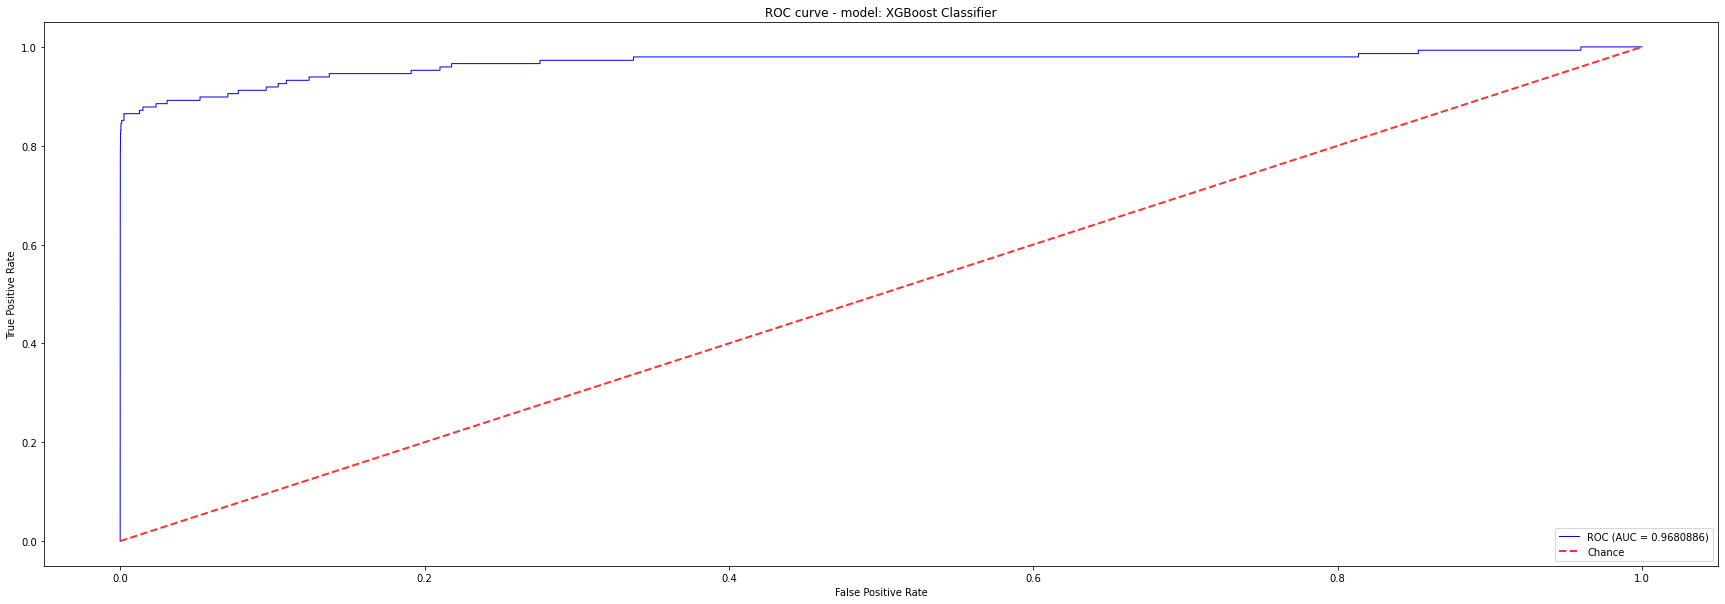

<Figure size 288x216 with 0 Axes>

Accuracy = 99.93%
Precision = 78.34%
Recall = 83.11%
F1-Score = 0.8065573770491803


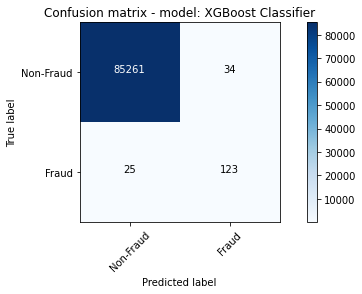

In [109]:
matrix_and_ROC_curve(('XGBoost Classifier',clf), X_train_smote, y_train_smote, X_test_smote, y_test)

### Checking Important Features

Top var = 15
2nd Top var = 5
3rd Top var = 13


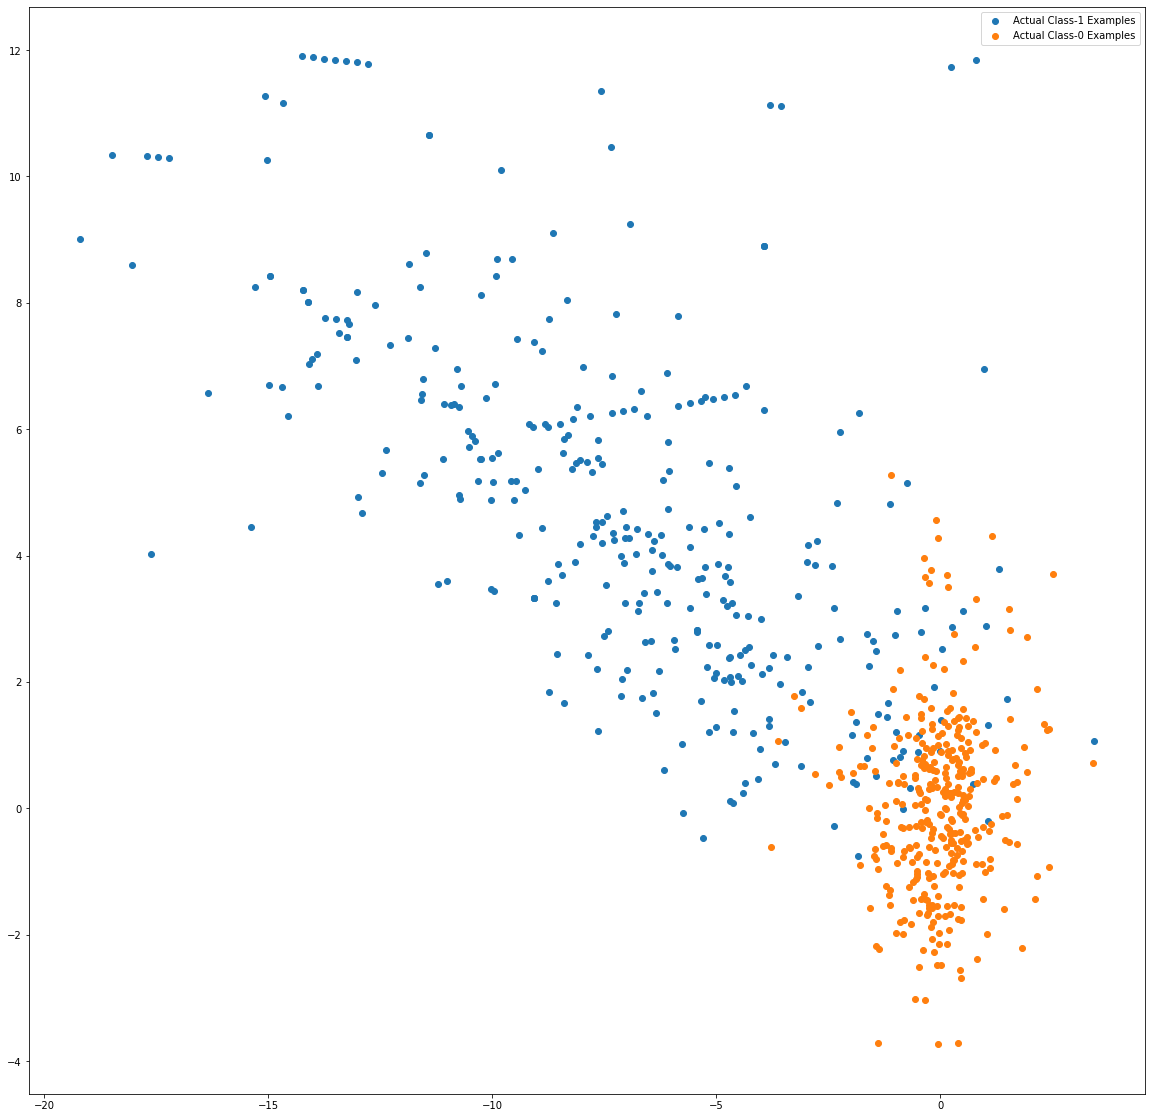

In [113]:
clf = clf

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

### Calculating Performance Metrics

In [111]:
print('Train auc = {0}'.format(roc_auc_score(y_test,y_test_pred)))

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])

threshold = thresholds[np.argmax(tpr-fpr)]

print("Optimum Threshold = {0}".format(threshold))

Train auc = 0.9153412322575228
Optimum Threshold = 0.003731156699359417
